####  The process of converting raw format of data into processable format is called Data Wrangling

#### Data Wrangling is a 6 step process and this process is also called as Data Munging 

1. Discovering
   - Understand the data
   - How to understand the data      - Data Dictionary
          - contains the meaning of each and every column
          - Can be in the form of Excel, CSV, txt, PDF
          - Prepared by Subject Matter Expert.
      - Google (Research)
      
2. Validating
   - Validation is done with 3 aspects
      - Quantity of the data
      - Quality of the data / Authenticity of the data.
      - Relevance
      
3. Enrichment
     - Issues found in the data validation, we ask the data provider to overcome the problems identified in the previous step which is data validation.

4. Structuring
      - Structuring can basically be called as Segmentation of columns
      - Whenever we get the data, we have three kinds of columns
          - Continuous
              - Examples: Age, Height, Salary, Credit Card limit, Loan Amount, EMI amount, Account Balance, Etc...
          - Categorical
              - Examples: Gender, State, Tier 1, Tier 2, Tier 3 Cities, Educational qualification, Etc....
              - These values need not be in a string format but can also be in the numeric form which is zero or 1 but it doesn't mean that the values are numeric but it represents the values in a true/false format
          - ID  Columns
               - Account Number (it is a ID, Unique number so it isn't a continuous or the categorical variable) , Email id, contact number, PAN Number etc...
               - We never analyze ID columns, we do not drop these columns as well, because these type of columns are used when joining the data sets or merging the data.


5. Cleaning
      - Cleaning is a data driven step.
      - This includes, drop the negative values, Find special values, Replacing the values 
      - Missing Values and the outliers are the most important things.
      
6. Publishing
      - Share or store the processed data which can be consumed by others.
      

##### EDA (Exploratory Data Analysis)

EDA refers to exploring the data to make some analysis and getting the insights which can be consumed by businessed to make business decisions.


#### Missing Values

1. What are the missing values
	- Data unavailable
    	 - User did not provide the information.
    	 - Machine Failure
    	 - Natural Calamity

2. Why do we need to take care of missing values
	- To make data complete
	- ML models especially linear models do not work with missing values

3. How to handle missing values
	- Drop the columns
    	 - In any column if missing values > threshold percentage then it is better to remove the column. The threshold isn't a fixed value but it varies between 30 to 50%
	- Drop the rows (mostly not recommended)
    	 - Drop rows only if there is a loss of 1-2% of data.
	- Imputation Strategy
    	 - Continuous
        	 - Business Understanding
             - Statistical method
                - Mean 
                   - Mean cannot be used whenever we have the outliers
                - Median
                  
    	- Categorical  
          - Business Understanding
          - Mode (Most Frequent Category)
  	
  	


In [1]:
# import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Read the Data

In [4]:
df_uncleaned = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/Uncleaned_DS_jobs.csv") 
df_uncleaned.shape

(689, 15)

In [5]:
df_uncleaned.head()

index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1      1     Data Scientist  $137K-$171K (Glassdoor est.)   
2      2     Data Scientist  $137K-$171K (Glassdoor est.)   
3      3     Data Scientist  $137K-$171K (Glassdoor est.)   
4      4                NaN  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df_uncleaned.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [8]:
df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              689 non-null    int64  
 1   Job Title          684 non-null    object 
 2   Salary Estimate    689 non-null    object 
 3   Job Description    689 non-null    object 
 4   Rating             684 non-null    float64
 5   Company Name       689 non-null    object 
 6   Location           689 non-null    object 
 7   Headquarters       689 non-null    object 
 8   Size               689 non-null    object 
 9   Founded            689 non-null    int64  
 10  Type of ownership  689 non-null    object 
 11  Industry           689 non-null    object 
 12  Sector             689 non-null    object 
 13  Revenue            689 non-null    object 
 14  Competitors        689 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 80.9+ KB


In [9]:
# Let's drop the index column

df_uncleaned.drop(['index'], axis =1, inplace = True)
df_uncleaned.head()

Job Title               Salary Estimate  \
0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1     Data Scientist  $137K-$171K (Glassdoor est.)   
2     Data Scientist  $137K-$171K (Glassdoor est.)   
3     Data Scientist  $137K-$171K (Glassdoor est.)   
4                NaN  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [10]:
# Which all unique job titles exists

df_uncleaned['Job Title'].unique()

array(['Sr Data Scientist', 'Data Scientist', nan,
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics', '22.3', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scientist - Ads Data Science',
       'Data S

In [11]:
len(df_uncleaned['Job Title'].unique())

174

In [12]:
df_uncleaned['Job Title'].value_counts().sort_values(ascending= False)

Data Scientist                                            337
Data Engineer                                              27
Senior Data Scientist                                      20
Machine Learning Engineer                                  17
Data Analyst                                               13
                                                         ... 
Big Data Engineer                                           1
Data Architect                                              1
Aviation AI/ML Data Scientist                               1
Machine Learning Engineer, Sr.                              1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: Job Title, Length: 173, dtype: int64

In [13]:
df_uncleaned['Job Title'].value_counts(normalize = True).sort_values(ascending= False)

Data Scientist                                            0.492690
Data Engineer                                             0.039474
Senior Data Scientist                                     0.029240
Machine Learning Engineer                                 0.024854
Data Analyst                                              0.019006
                                                            ...   
Big Data Engineer                                         0.001462
Data Architect                                            0.001462
Aviation AI/ML Data Scientist                             0.001462
Machine Learning Engineer, Sr.                            0.001462
AI/ML - Machine Learning Scientist, Siri Understanding    0.001462
Name: Job Title, Length: 173, dtype: float64

In [14]:
# Salary Estimate Column

df_uncleaned['Salary Estimate']

0      $137K-$171K (Glassdoor est.)
1      $137K-$171K (Glassdoor est.)
2      $137K-$171K (Glassdoor est.)
3      $137K-$171K (Glassdoor est.)
4      $137K-$171K (Glassdoor est.)
                   ...             
684     $79K-$131K (Glassdoor est.)
685     $79K-$131K (Glassdoor est.)
686     $79K-$131K (Glassdoor est.)
687     $79K-$131K (Glassdoor est.)
688     $79K-$131K (Glassdoor est.)
Name: Salary Estimate, Length: 689, dtype: object

In [15]:
# Regular Expressions

import re
re.sub('[0-9-]','','$137K-$171K (Glassdoor est.)')

'$K$K (Glassdoor est.)'

In [16]:
import re
re.sub('[^0-9-]','','$137K-$171K (Glassdoor est.)')

'137-171'

In [17]:
import re
re.sub('[^0-9-]','*','$137K-$171K (Glassdoor est.)')

'*137*-*171******************'

In [18]:
df_uncleaned['Salary Estimate'].apply(lambda x: re.sub('[^0-9-]','',x))

0      137-171
1      137-171
2      137-171
3      137-171
4      137-171
        ...   
684     79-131
685     79-131
686     79-131
687     79-131
688     79-131
Name: Salary Estimate, Length: 689, dtype: object

In [19]:
# Using Split function

df_uncleaned['Salary Estimate'] = df_uncleaned['Salary Estimate'].apply(lambda x: x.split('(')[0])
df_uncleaned.head()

Job Title Salary Estimate  \
0  Sr Data Scientist    $137K-$171K    
1     Data Scientist    $137K-$171K    
2     Data Scientist    $137K-$171K    
3     Data Scientist    $137K-$171K    
4                NaN    $137K-$171K    

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [20]:
# Using Split function

df_uncleaned['Salary Estimate'] = df_uncleaned['Salary Estimate'].apply(lambda x: x.replace('K',''))
df_uncleaned.head()

Job Title Salary Estimate  \
0  Sr Data Scientist      $137-$171    
1     Data Scientist      $137-$171    
2     Data Scientist      $137-$171    
3     Data Scientist      $137-$171    
4                NaN      $137-$171    

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [21]:
df_uncleaned['Salary Estimate']

0      $137-$171 
1      $137-$171 
2      $137-$171 
3      $137-$171 
4      $137-$171 
          ...    
684     $79-$131 
685     $79-$131 
686     $79-$131 
687     $79-$131 
688     $79-$131 
Name: Salary Estimate, Length: 689, dtype: object

In [22]:
df_uncleaned['Salary Estimate'] = df_uncleaned['Salary Estimate'].apply(lambda x: x.replace('$',''))
df_uncleaned.head()

Job Title Salary Estimate  \
0  Sr Data Scientist        137-171    
1     Data Scientist        137-171    
2     Data Scientist        137-171    
3     Data Scientist        137-171    
4                NaN        137-171    

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [23]:
# Extract the min salary from the salary estimate and insert it after salary estimate column

df_uncleaned.insert(2, 'Min_Salary', df_uncleaned['Salary Estimate'].apply(lambda x: x.split('-')[0]))
df_uncleaned.head()

Job Title Salary Estimate Min_Salary  \
0  Sr Data Scientist        137-171         137   
1     Data Scientist        137-171         137   
2     Data Scientist        137-171         137   
3     Data Scientist        137-171         137   
4                NaN        137-171         137   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [24]:
# Multiply Min Sal by 1000

df_uncleaned['Min_Salary'] = df_uncleaned['Min_Salary'].apply(lambda x: int(x)*1000)
df_uncleaned.head()

Job Title Salary Estimate  Min_Salary  \
0  Sr Data Scientist        137-171       137000   
1     Data Scientist        137-171       137000   
2     Data Scientist        137-171       137000   
3     Data Scientist        137-171       137000   
4                NaN        137-171       137000   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [25]:
# Repeat the same process to extract Max Sal and multiply by 1000

df_uncleaned.insert(3, 'Max_Salary', df_uncleaned['Salary Estimate'].apply(lambda x: x.split('-')[1]))
df_uncleaned.head()

Job Title Salary Estimate  Min_Salary Max_Salary  \
0  Sr Data Scientist        137-171       137000       171    
1     Data Scientist        137-171       137000       171    
2     Data Scientist        137-171       137000       171    
3     Data Scientist        137-171       137000       171    
4                NaN        137-171       137000       171    

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [26]:
df_uncleaned['Max_Salary'] = df_uncleaned['Max_Salary'].apply(lambda x: int(x)*1000)
df_uncleaned.head()

Job Title Salary Estimate  Min_Salary  Max_Salary  \
0  Sr Data Scientist        137-171       137000      171000   
1     Data Scientist        137-171       137000      171000   
2     Data Scientist        137-171       137000      171000   
3     Data Scientist        137-171       137000      171000   
4                NaN        137-171       137000      171000   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
# Clean Job Description column

df_uncleaned['Job Description'][0]

"Description\n\nThe Senior Data Scientist is responsible for defining, building, and improving statistical models to improve business processes and outcomes in one or more healthcare domains such as Clinical, Enrollment, Claims, and Finance. As part of the broader analytics team, Data Scientist will gather and analyze data to solve and address complex business problems and evaluate scenarios to make predictions on future outcomes and work with the business to communicate and support decision-making. This position requires strong analytical skills and experience in analytic methods including multivariate regressions, hierarchical linear models, regression trees, clustering methods and other complex statistical techniques.\n\nDuties & Responsibilities:\n\n• Develops advanced statistical models to predict, quantify or forecast various operational and performance metrics in multiple healthcare domains\n• Investigates, recommends, and initiates acquisition of new data resources from interna

In [29]:
df_uncleaned['Job Description'] = df_uncleaned['Job Description'].apply(lambda x:x.replace('\n',''))
df_uncleaned['Job Description'].head()

0    DescriptionThe Senior Data Scientist is respon...
1    Secure our Nation, Ignite your FutureJoin the ...
2    OverviewAnalysis Group is one of the largest i...
3    JOB DESCRIPTION:Do you have a passion for Data...
4    Data ScientistAffinity Solutions / Marketing C...
Name: Job Description, dtype: object

In [30]:
df_uncleaned['Job Description'][0]

"DescriptionThe Senior Data Scientist is responsible for defining, building, and improving statistical models to improve business processes and outcomes in one or more healthcare domains such as Clinical, Enrollment, Claims, and Finance. As part of the broader analytics team, Data Scientist will gather and analyze data to solve and address complex business problems and evaluate scenarios to make predictions on future outcomes and work with the business to communicate and support decision-making. This position requires strong analytical skills and experience in analytic methods including multivariate regressions, hierarchical linear models, regression trees, clustering methods and other complex statistical techniques.Duties & Responsibilities:• Develops advanced statistical models to predict, quantify or forecast various operational and performance metrics in multiple healthcare domains• Investigates, recommends, and initiates acquisition of new data resources from internal and external

In [31]:
# Rating

df_uncleaned['Rating'].unique()

array([ 3.1,  4.2,  3.8,  3.5,  2.9,  3.9,  4.4,  3.6,  4.5,  4.7,  3.7,
        3.4,  4.1,  5.6,  3.2,  4.3,  2.8,  5. ,  5.2,  3.3,  2.7,  2.2,
        2.6,  4.8,  nan,  4. ,  2.5,  4.9,  2.4, -1. ,  2.3,  4.6,  3. ,
        2.1,  2. ])

In [32]:
df_uncleaned['Rating'].nunique()

34

In [33]:
sum(df_uncleaned['Rating']==-1.0)

50

In [34]:
df_uncleaned['Rating'] = np.where(df_uncleaned['Rating'] == -1.0, 0.0, df_uncleaned.Rating)
df_uncleaned.head()

Job Title Salary Estimate  Min_Salary  Max_Salary  \
0  Sr Data Scientist        137-171       137000      171000   
1     Data Scientist        137-171       137000      171000   
2     Data Scientist        137-171       137000      171000   
3     Data Scientist        137-171       137000      171000   
4                NaN        137-171       137000      171000   

                                     Job Description  Rating  \
0  DescriptionThe Senior Data Scientist is respon...     3.1   
1  Secure our Nation, Ignite your FutureJoin the ...     4.2   
2  OverviewAnalysis Group is one of the largest i...     3.8   
3  JOB DESCRIPTION:Do you have a passion for Data...     3.5   
4  Data ScientistAffinity Solutions / Marketing C...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [35]:
df_uncleaned['Rating'].value_counts()

3.5    61
0.0    50
3.3    42
3.7    41
3.8    41
3.9    40
4.0    40
5.0    36
4.5    34
3.6    31
3.4    31
4.2    29
4.1    26
4.4    23
3.2    22
4.7    21
4.8    20
2.9    14
4.3    13
4.6    12
3.1    12
4.9    11
2.7    10
3.0     7
2.6     4
2.5     3
2.8     3
2.2     1
5.2     1
2.4     1
2.3     1
5.6     1
2.1     1
2.0     1
Name: Rating, dtype: int64

In [36]:
# Company Name

df_uncleaned.columns


Index(['Job Title', 'Salary Estimate', 'Min_Salary', 'Max_Salary',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors'],
      dtype='object')

In [37]:
df_uncleaned.head()

Job Title Salary Estimate  Min_Salary  Max_Salary  \
0  Sr Data Scientist        137-171       137000      171000   
1     Data Scientist        137-171       137000      171000   
2     Data Scientist        137-171       137000      171000   
3     Data Scientist        137-171       137000      171000   
4                NaN        137-171       137000      171000   

                                     Job Description  Rating  \
0  DescriptionThe Senior Data Scientist is respon...     3.1   
1  Secure our Nation, Ignite your FutureJoin the ...     4.2   
2  OverviewAnalysis Group is one of the largest i...     3.8   
3  JOB DESCRIPTION:Do you have a passion for Data...     3.5   
4  Data ScientistAffinity Solutions / Marketing C...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA              Boston, MA   
3             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions\n2.9   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [38]:
df_uncleaned['Company Name'][0]

'Healthfirst\n3.1'

In [39]:
df_uncleaned['Company Name'][1]

'ManTech\n4.2'

In [40]:
df_uncleaned['Company Name'] = df_uncleaned['Company Name'].apply(lambda x: x.split('\n')[0])
df_uncleaned.head()

Job Title Salary Estimate  Min_Salary  Max_Salary  \
0  Sr Data Scientist        137-171       137000      171000   
1     Data Scientist        137-171       137000      171000   
2     Data Scientist        137-171       137000      171000   
3     Data Scientist        137-171       137000      171000   
4                NaN        137-171       137000      171000   

                                     Job Description  Rating  \
0  DescriptionThe Senior Data Scientist is respon...     3.1   
1  Secure our Nation, Ignite your FutureJoin the ...     4.2   
2  OverviewAnalysis Group is one of the largest i...     3.8   
3  JOB DESCRIPTION:Do you have a passion for Data...     3.5   
4  Data ScientistAffinity Solutions / Marketing C...     2.9   

         Company Name       Location            Headquarters  \
0         Healthfirst   New York, NY            New York, NY   
1             ManTech  Chantilly, VA             Herndon, VA   
2      Analysis Group     Boston, MA              Boston, MA   
3             INFICON     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [41]:
# Add a new column called 'Working at head office' to confirm if the employee works at head office or some other branch.

df_uncleaned['Working in Headquarters'] = (df_uncleaned['Location'] == df_uncleaned['Headquarters']).apply(lambda x: 1 if x else 0)
df_uncleaned.head()

Job Title Salary Estimate  Min_Salary  Max_Salary  \
0  Sr Data Scientist        137-171       137000      171000   
1     Data Scientist        137-171       137000      171000   
2     Data Scientist        137-171       137000      171000   
3     Data Scientist        137-171       137000      171000   
4                NaN        137-171       137000      171000   

                                     Job Description  Rating  \
0  DescriptionThe Senior Data Scientist is respon...     3.1   
1  Secure our Nation, Ignite your FutureJoin the ...     4.2   
2  OverviewAnalysis Group is one of the largest i...     3.8   
3  JOB DESCRIPTION:Do you have a passion for Data...     3.5   
4  Data ScientistAffinity Solutions / Marketing C...     2.9   

         Company Name       Location            Headquarters  \
0         Healthfirst   New York, NY            New York, NY   
1             ManTech  Chantilly, VA             Herndon, VA   
2      Analysis Group     Boston, MA              Boston, MA   
3             INFICON     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions   New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  Working in Headquarters  
0            EmblemHealth, UnitedHealth Group, Aetna                        1  
1                                                 -1                        0  
2                                                 -1                        1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...                        0  
4               Commerce Signals, Cardlytics, Yodlee                        1

In [42]:
# Alternative way

#df_uncleaned['Working at Head Office'] = np.where((df_uncleaned['Location'] == df_uncleaned["Headquarters"]),1,0)
#df_uncleaned.head()

In [43]:
df_uncleaned['Working in Headquarters'].value_counts()

0    406
1    283
Name: Working in Headquarters, dtype: int64

In [44]:
df_uncleaned['Job Title'].unique()

array(['Sr Data Scientist', 'Data Scientist', nan,
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics', '22.3', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scientist - Ads Data Science',
       'Data S

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv("day.csv")
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [47]:
df.shape

(730, 16)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [49]:
df['weekday'].mode()[0]

1

In [50]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [51]:
# https://cdn.upgrad.com/uploads/production/0fdfa494-a9bf-4b32-873f-900e3b262948/Readme.txt

In [52]:
# Missing Values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [53]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [54]:
cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont = ['temp','atemp','hum', 'windspeed','casual','registered','cnt']
id_cols = ['instant','dteday']

In [55]:
len(cat)+len(cont)+len(id_cols)

16

#### Univariate Analysis

Analysing one variable at a time

Histogram of temp


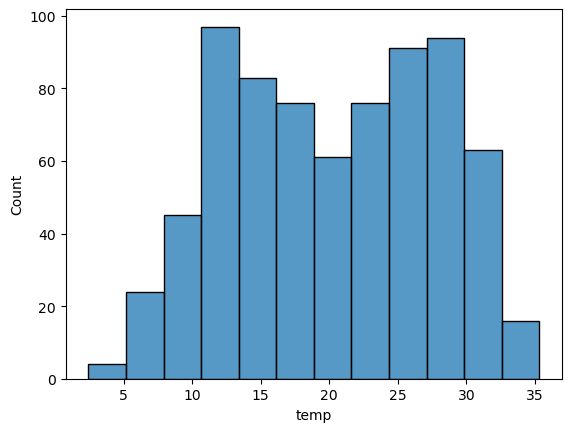

Histogram of atemp


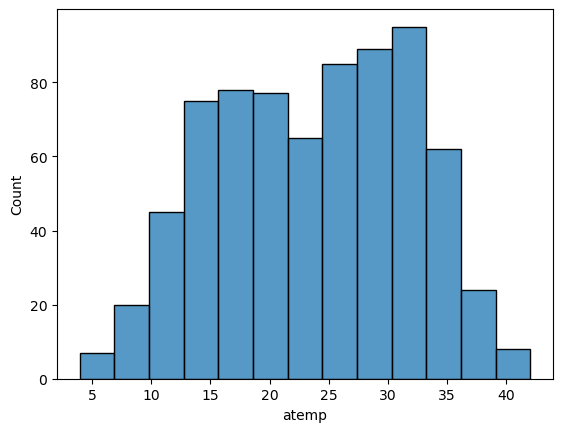

Histogram of hum


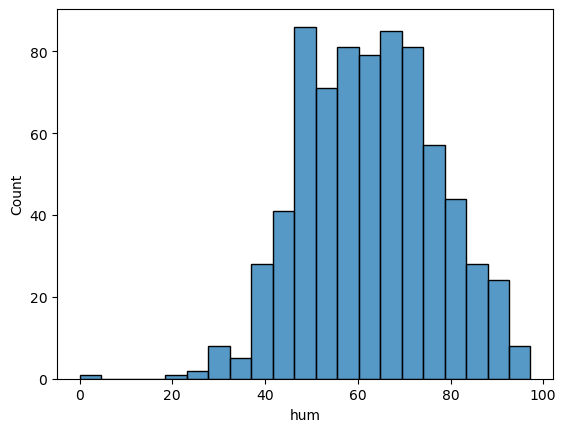

Histogram of windspeed


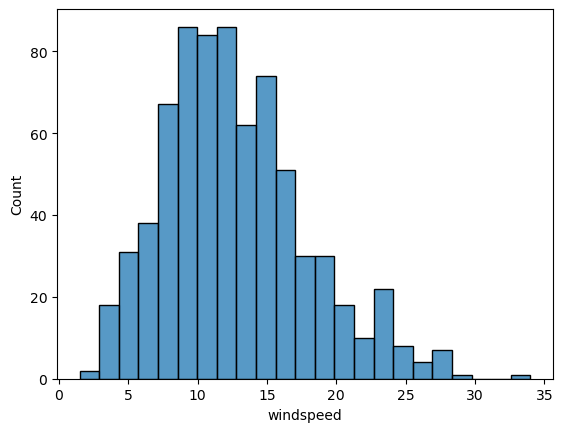

Histogram of casual


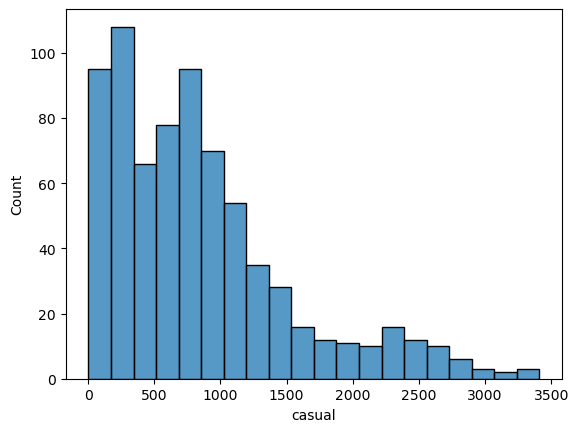

Histogram of registered


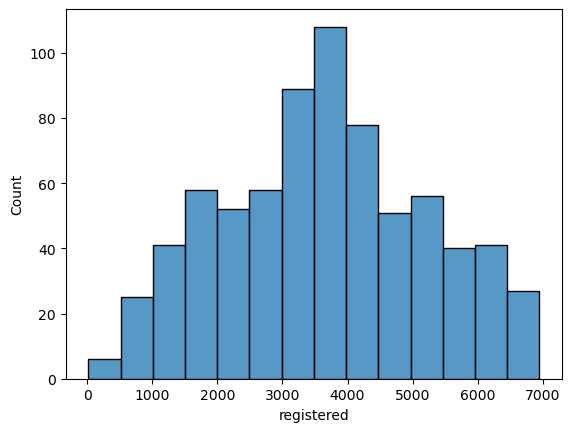

Histogram of cnt


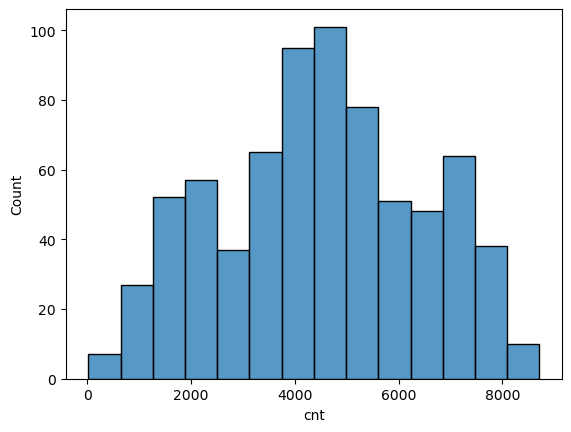

In [56]:
for i in cont:
    print("Histogram of", i)
    sns.histplot(df[i])
    plt.show()

Boxplot of temp


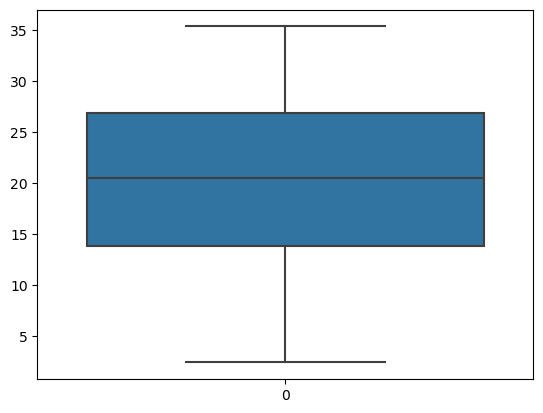

Boxplot of atemp


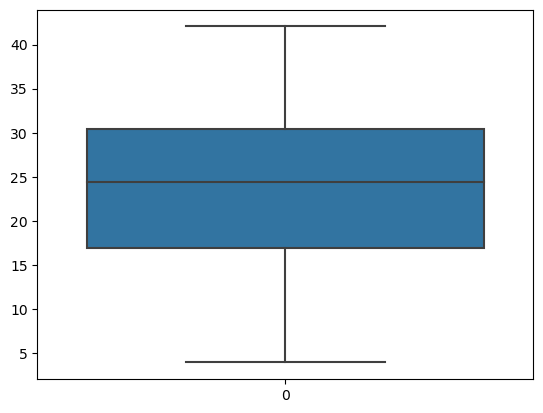

Boxplot of hum


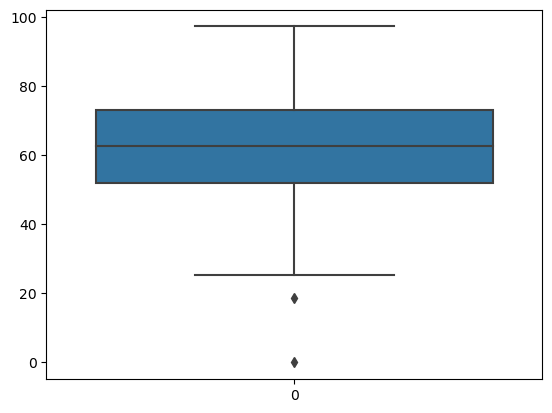

Boxplot of windspeed


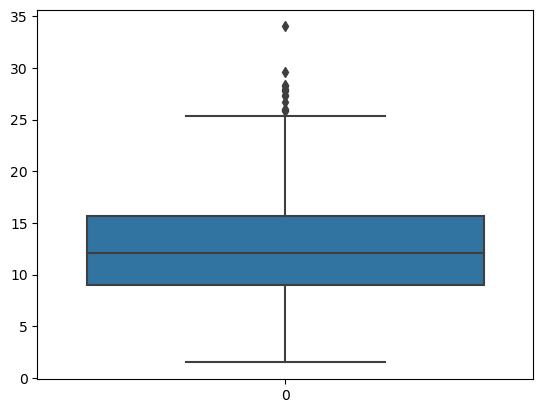

Boxplot of casual


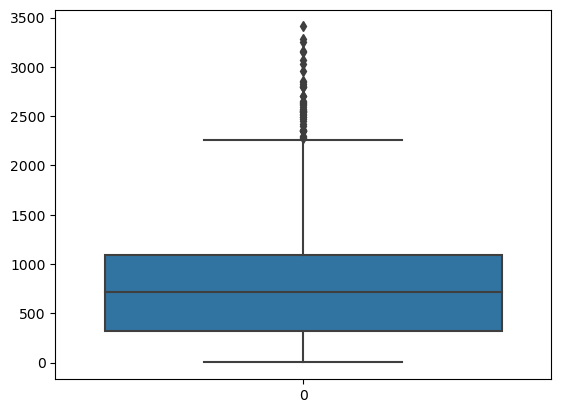

Boxplot of registered


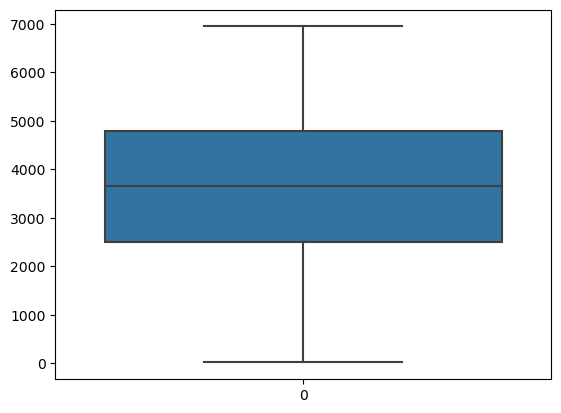

Boxplot of cnt


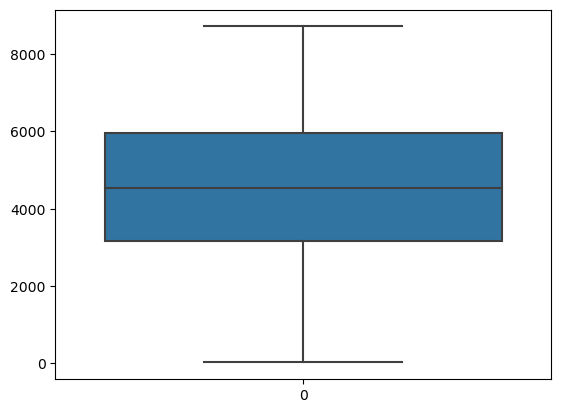

In [57]:
for i in cont:
    print('Boxplot of', i)
    sns.boxplot(df[i])
    plt.show()

Countplot of season


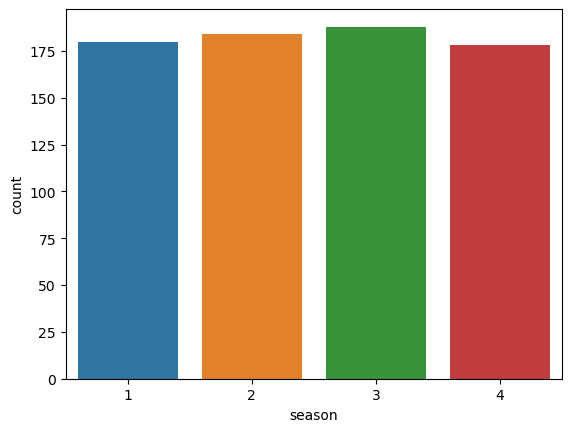

Countplot of yr


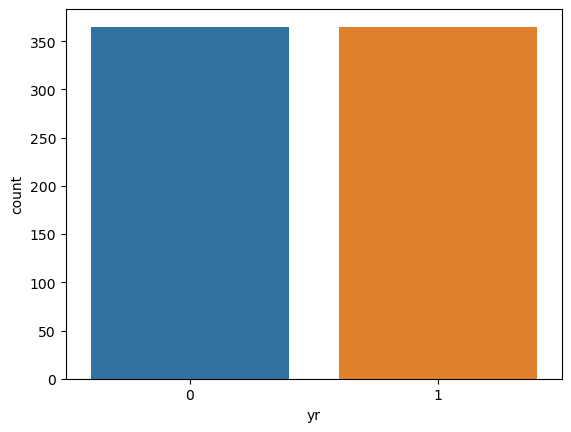

Countplot of mnth


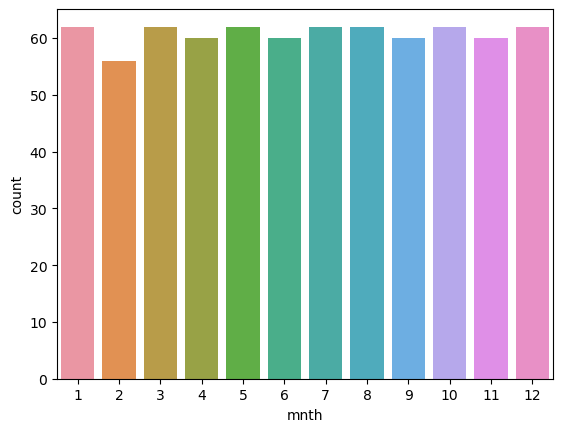

Countplot of holiday


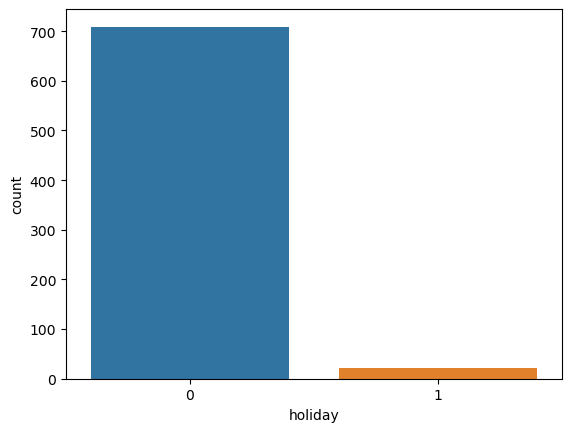

Countplot of weekday


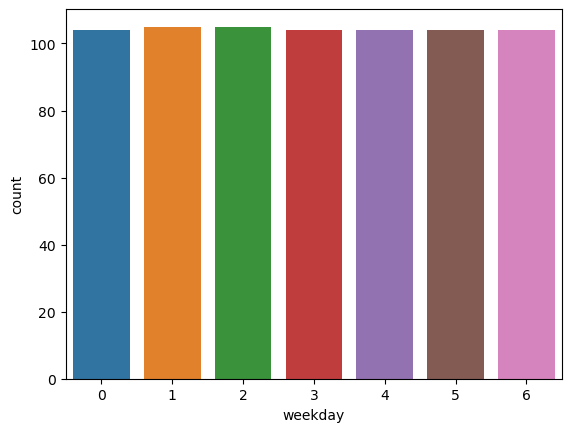

Countplot of workingday


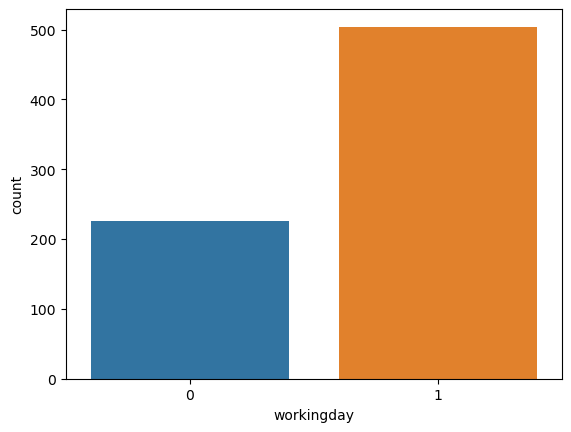

Countplot of weathersit


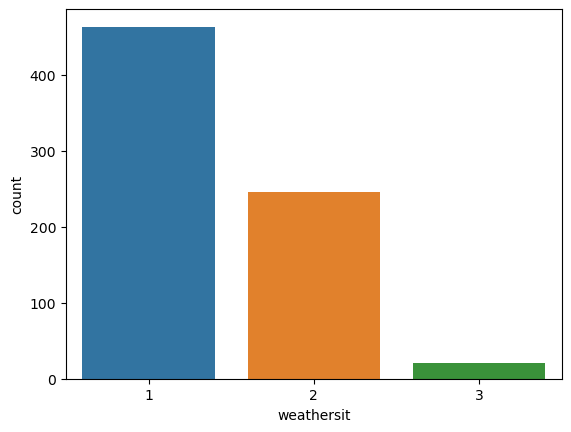

In [62]:
for i in cat:
    print("Countplot of",i)
    sns.countplot(data = df, x= i)
    plt.show()

#### Bivariate Analysis

Analysing two columns 

ScatterPlot temp Vs atemp


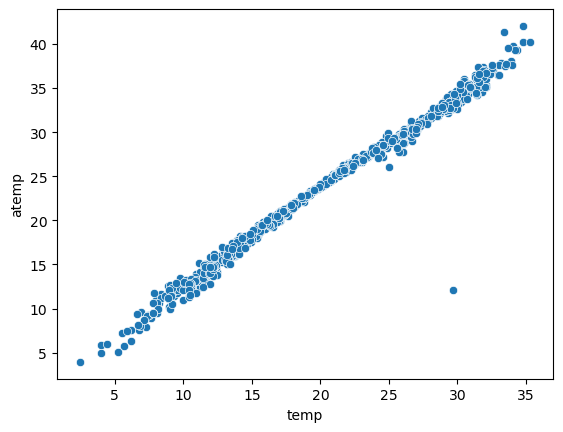

ScatterPlot temp Vs hum


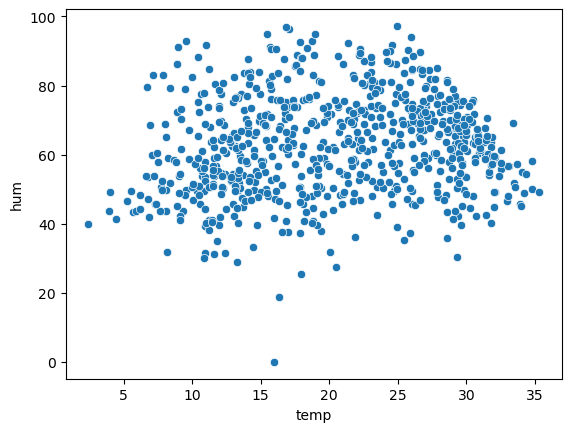

ScatterPlot temp Vs windspeed


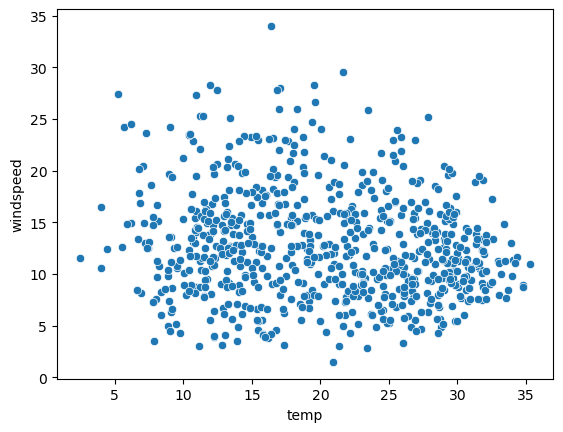

ScatterPlot temp Vs casual


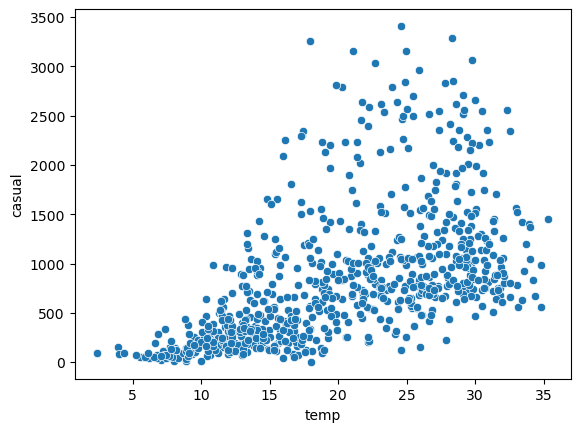

ScatterPlot temp Vs registered


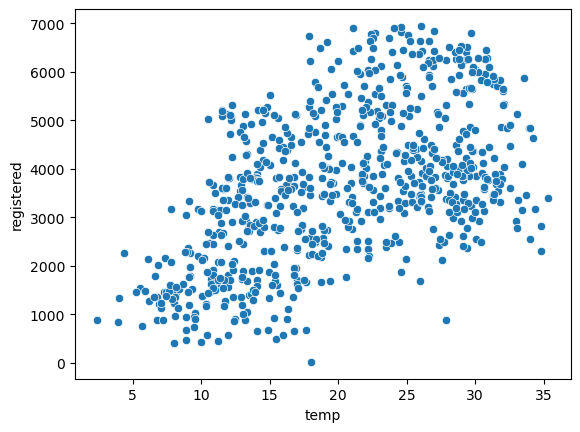

ScatterPlot temp Vs cnt


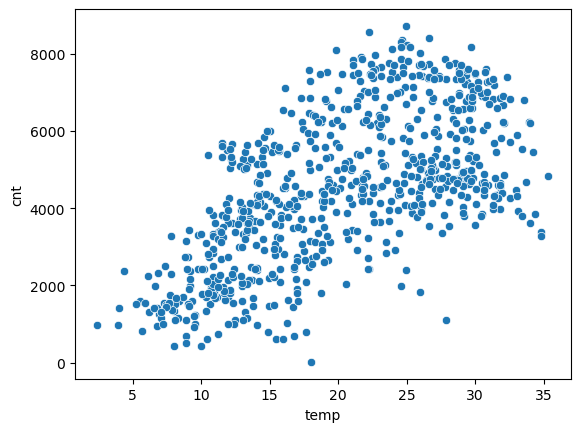

ScatterPlot atemp Vs temp


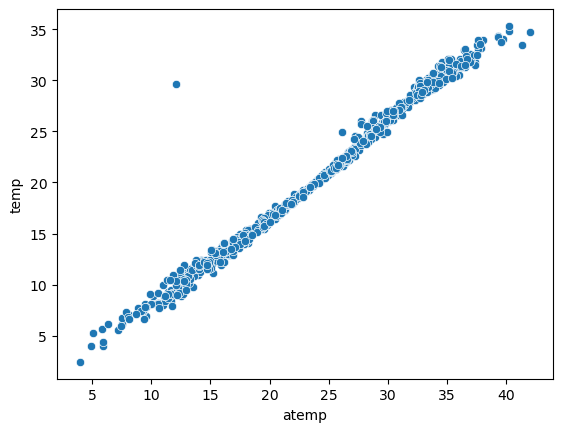

ScatterPlot atemp Vs hum


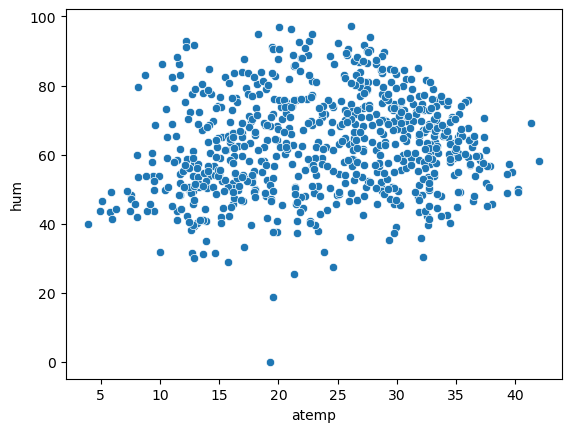

ScatterPlot atemp Vs windspeed


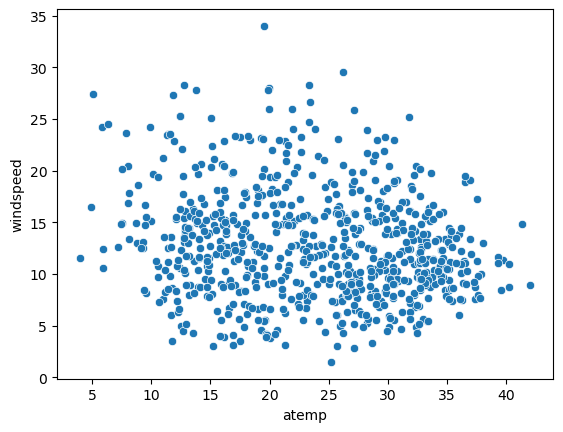

ScatterPlot atemp Vs casual


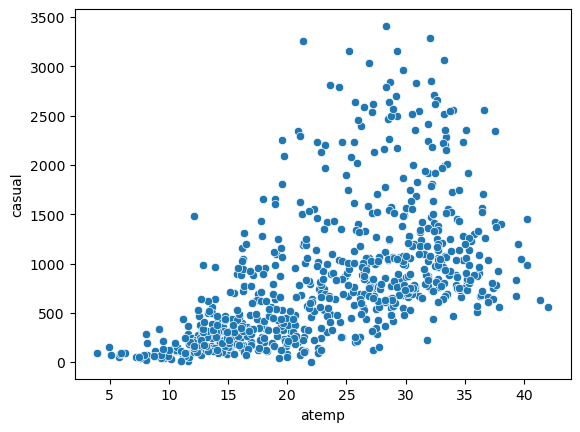

ScatterPlot atemp Vs registered


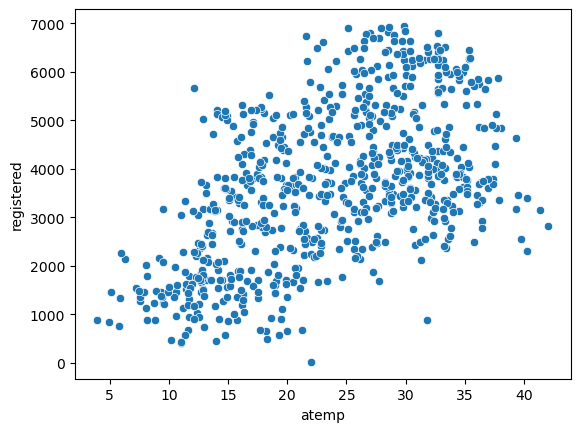

ScatterPlot atemp Vs cnt


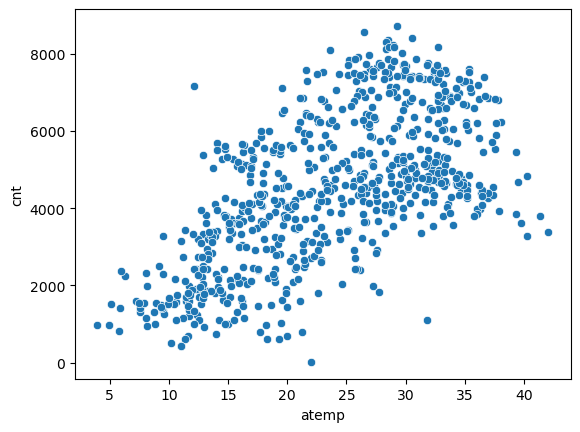

ScatterPlot hum Vs temp


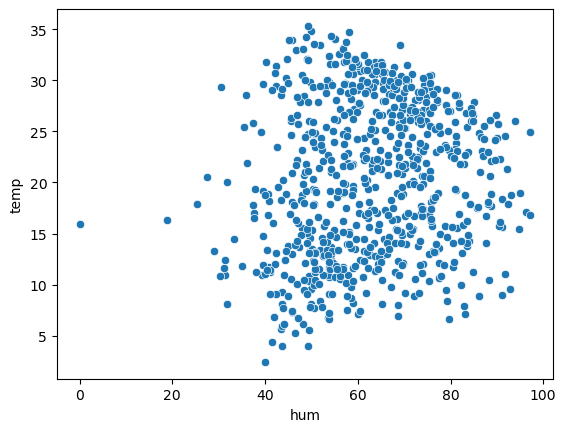

ScatterPlot hum Vs atemp


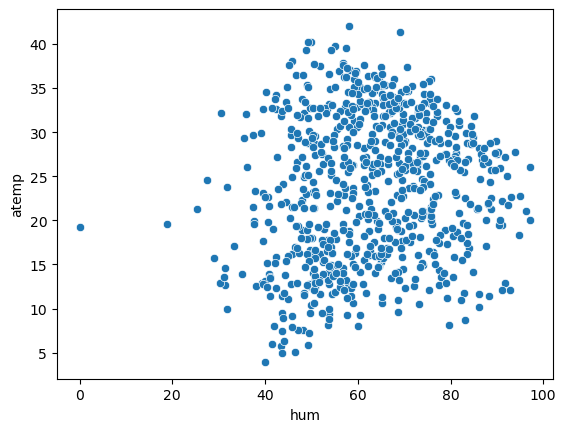

ScatterPlot hum Vs windspeed


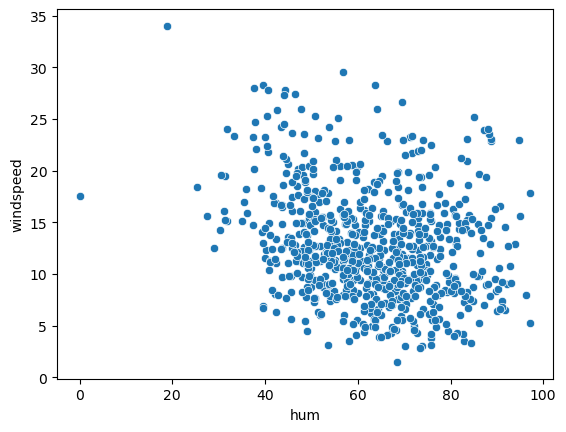

ScatterPlot hum Vs casual


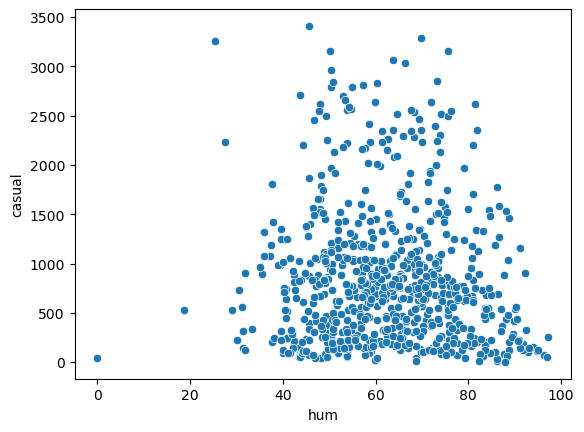

ScatterPlot hum Vs registered


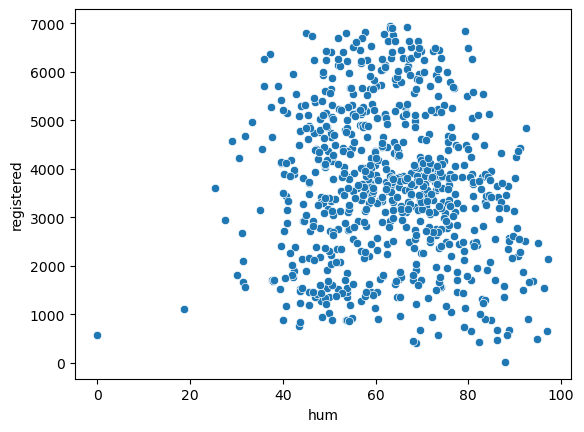

ScatterPlot hum Vs cnt


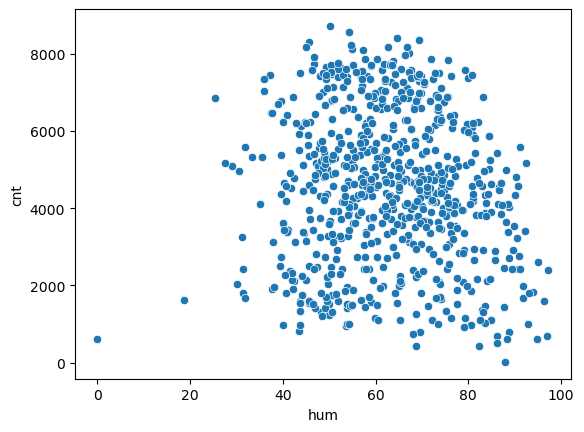

ScatterPlot windspeed Vs temp


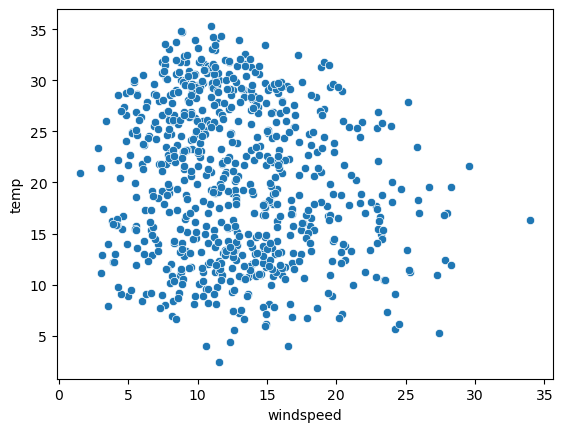

ScatterPlot windspeed Vs atemp


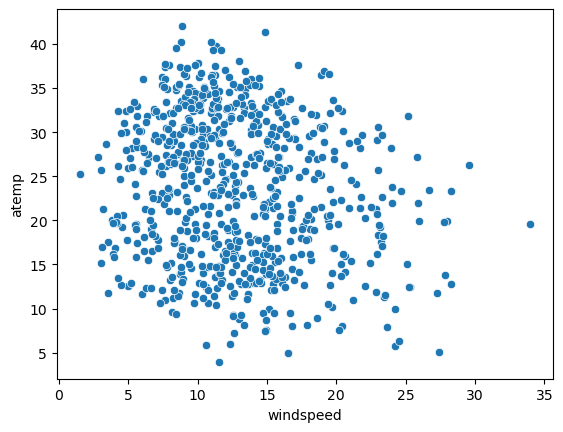

ScatterPlot windspeed Vs hum


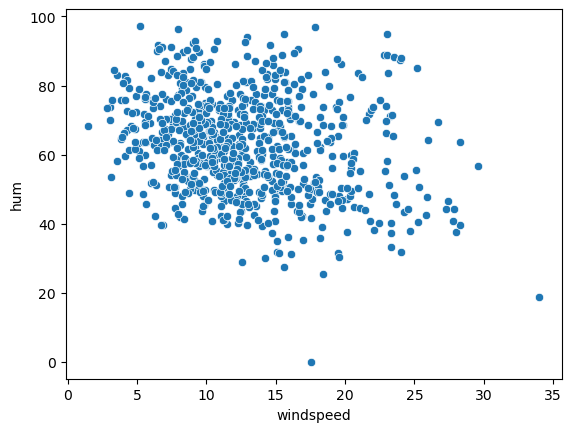

ScatterPlot windspeed Vs casual


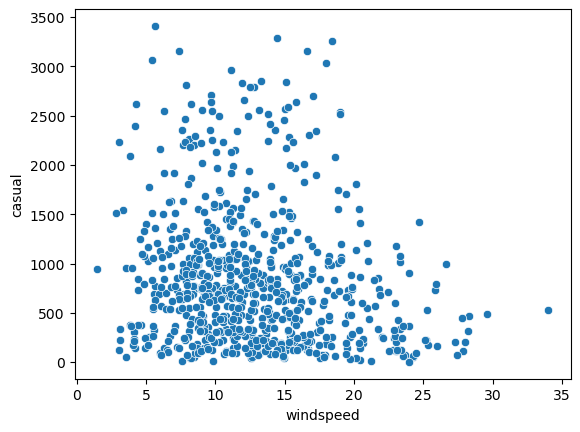

ScatterPlot windspeed Vs registered


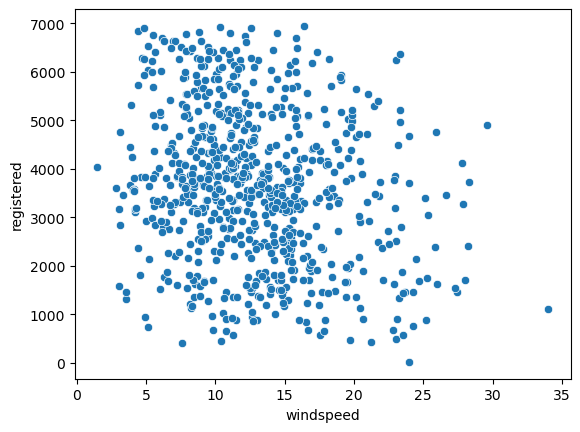

ScatterPlot windspeed Vs cnt


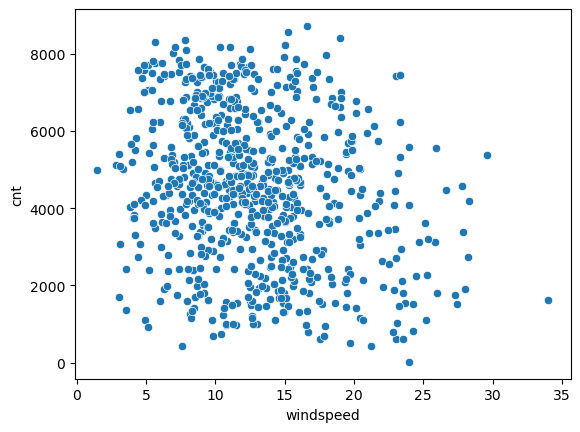

ScatterPlot casual Vs temp


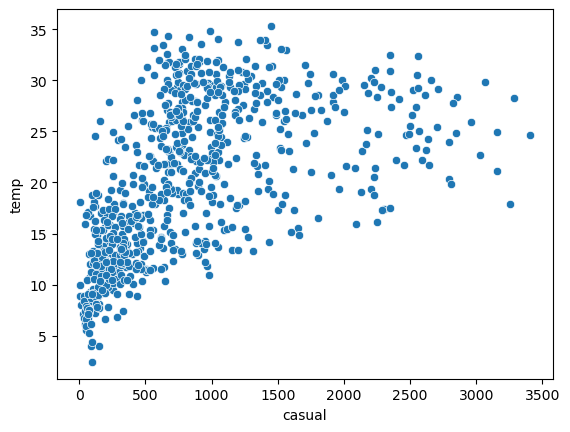

ScatterPlot casual Vs atemp


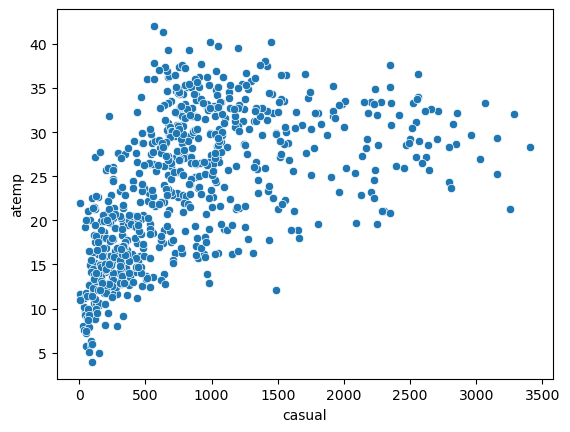

ScatterPlot casual Vs hum


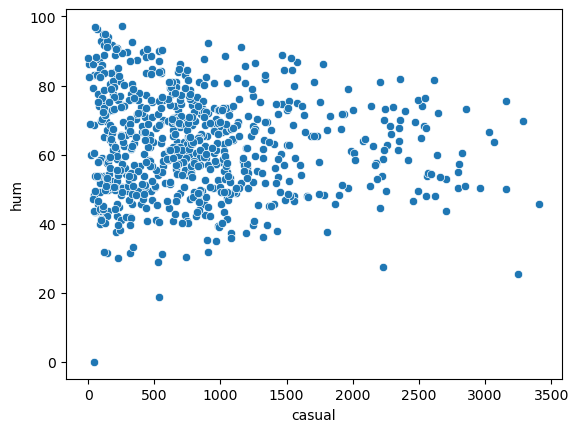

ScatterPlot casual Vs windspeed


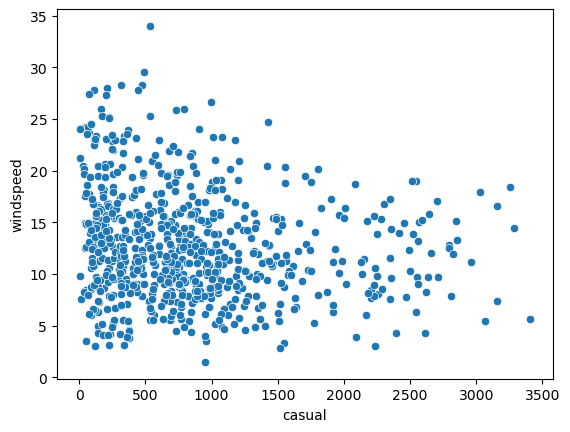

ScatterPlot casual Vs registered


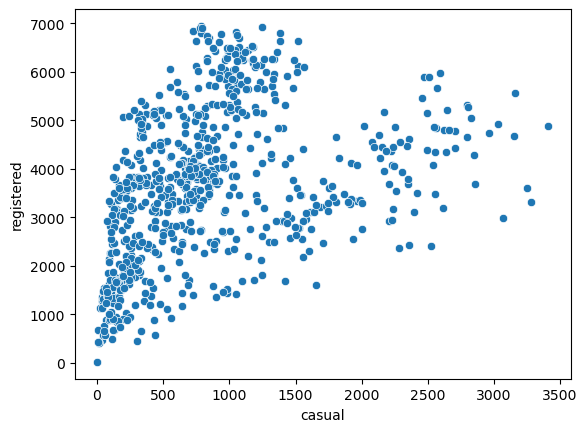

ScatterPlot casual Vs cnt


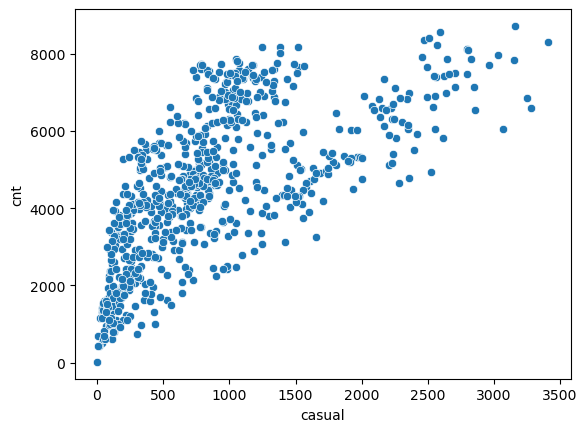

ScatterPlot registered Vs temp


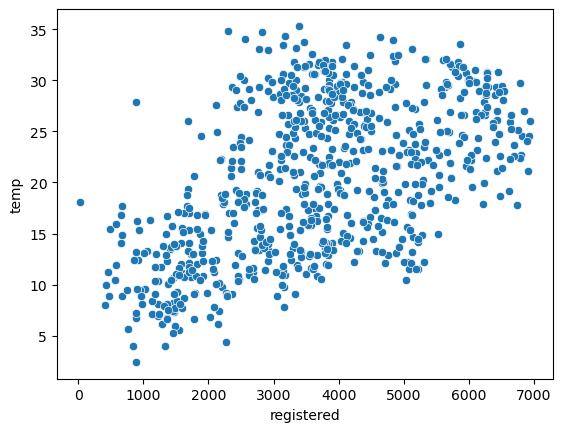

ScatterPlot registered Vs atemp


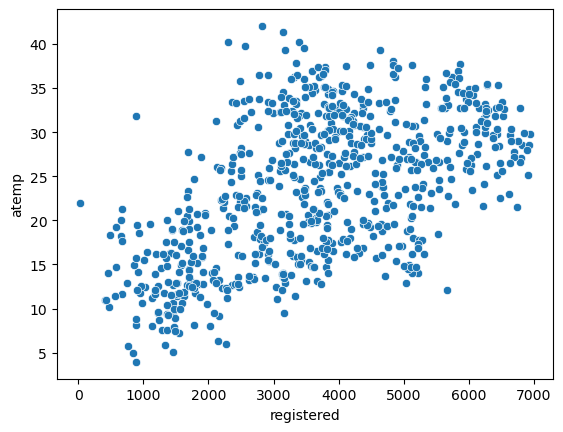

ScatterPlot registered Vs hum


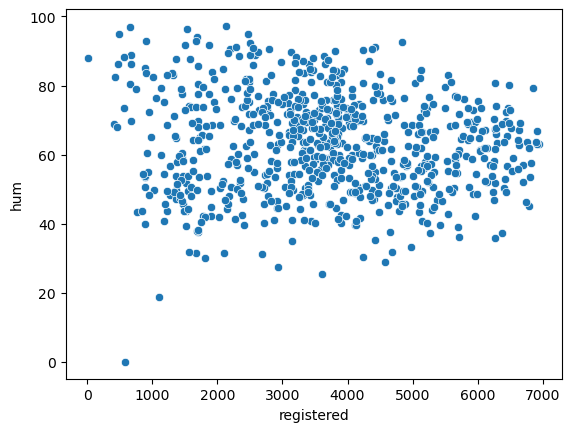

ScatterPlot registered Vs windspeed


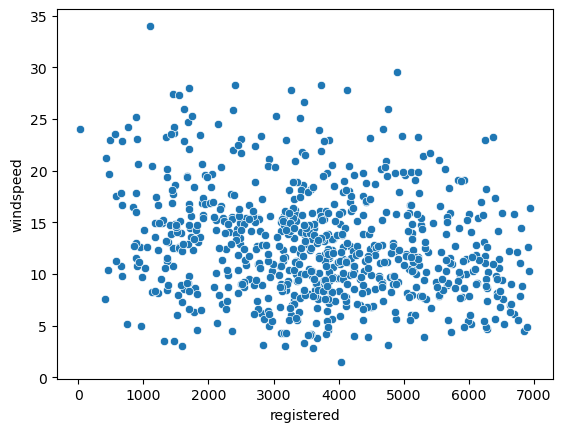

ScatterPlot registered Vs casual


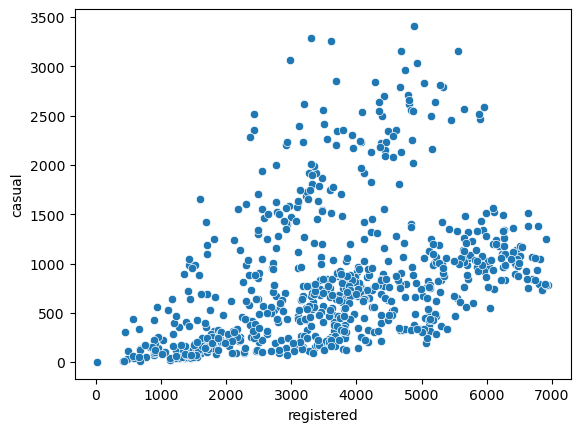

ScatterPlot registered Vs cnt


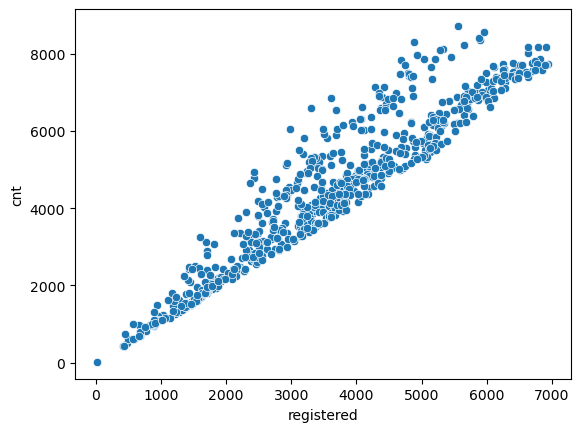

ScatterPlot cnt Vs temp


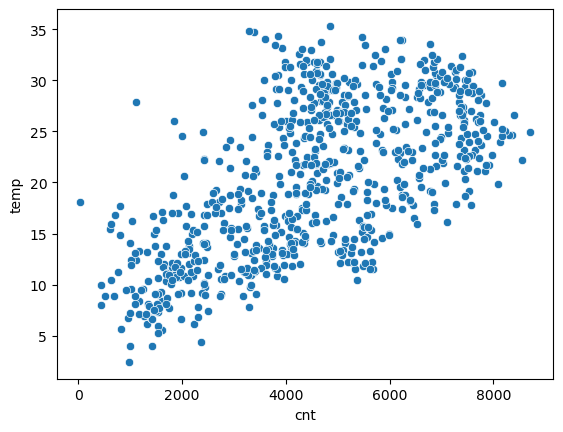

ScatterPlot cnt Vs atemp


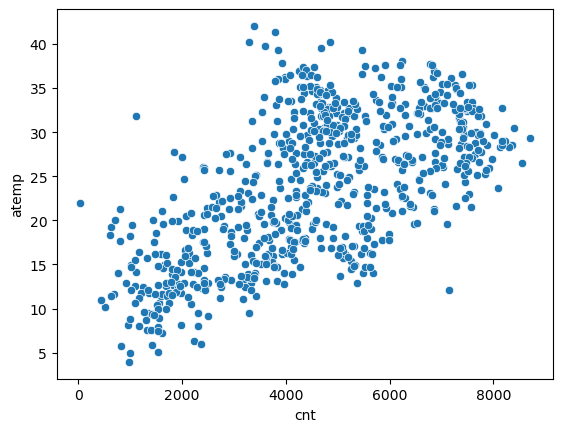

ScatterPlot cnt Vs hum


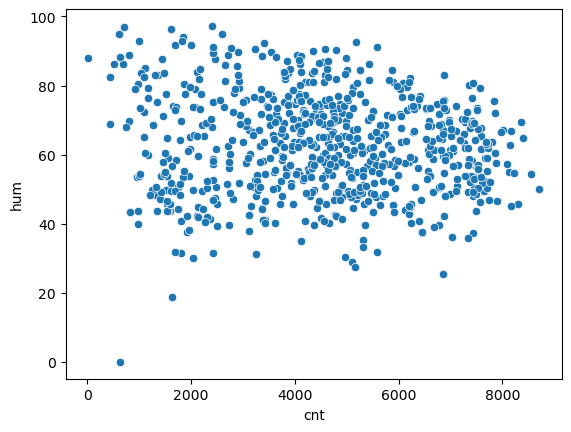

ScatterPlot cnt Vs windspeed


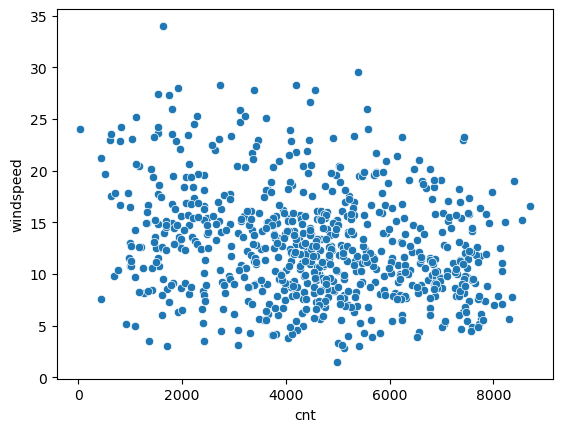

ScatterPlot cnt Vs casual


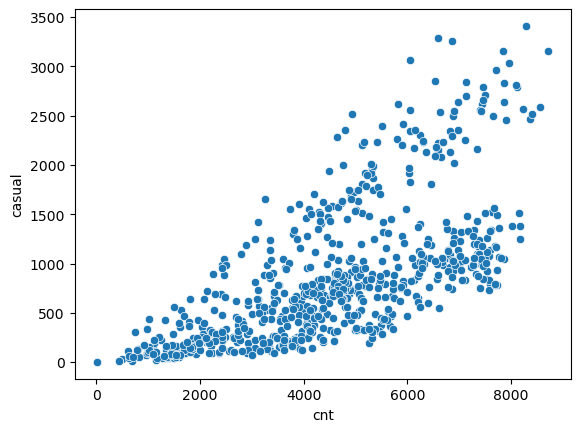

ScatterPlot cnt Vs registered


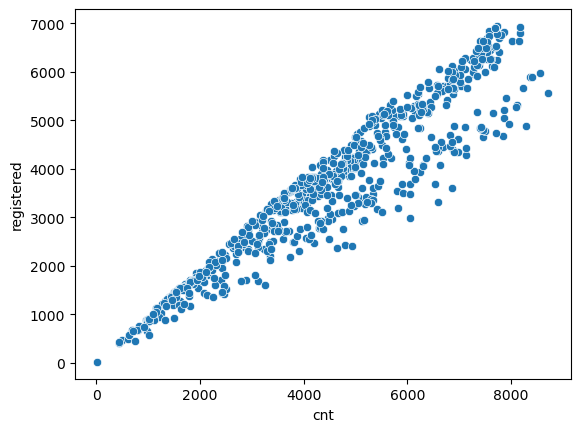

In [61]:
for i in cont:
    for j in cont:
        if i!=j:
            print("ScatterPlot", i, "Vs", j)
            sns.scatterplot(data = df, x=i, y=j)
            plt.show()

Boxplot season Vs temp


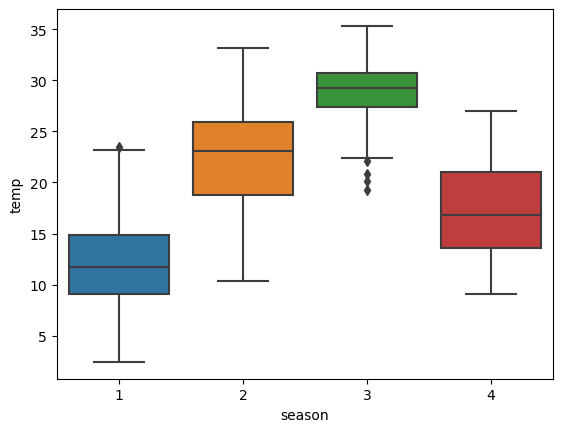

Boxplot season Vs atemp


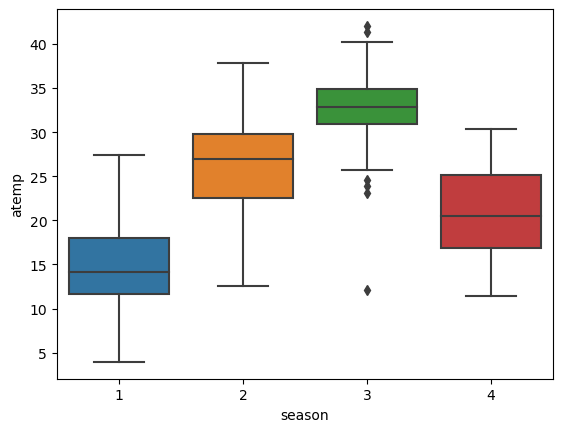

Boxplot season Vs hum


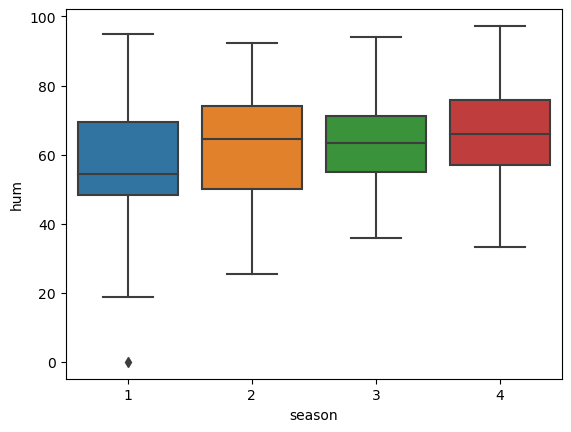

Boxplot season Vs windspeed


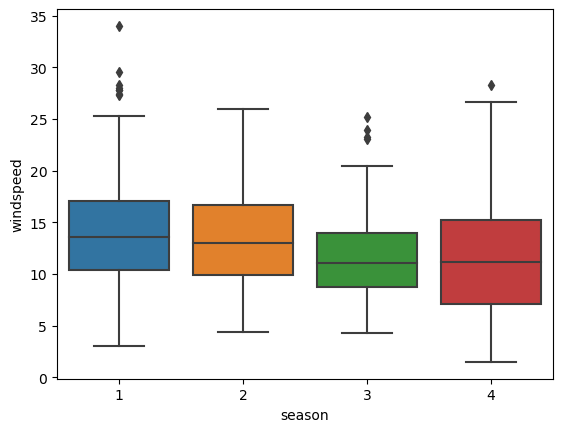

Boxplot season Vs casual


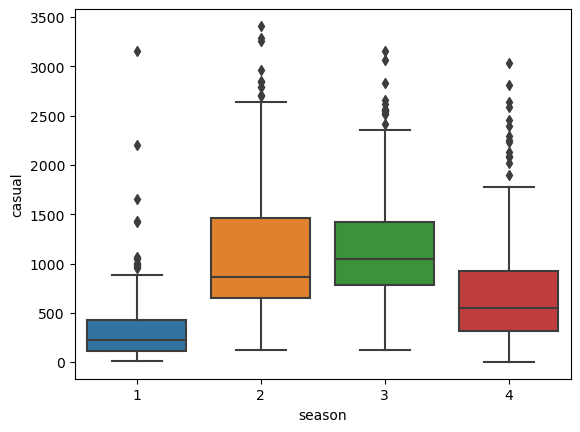

Boxplot season Vs registered


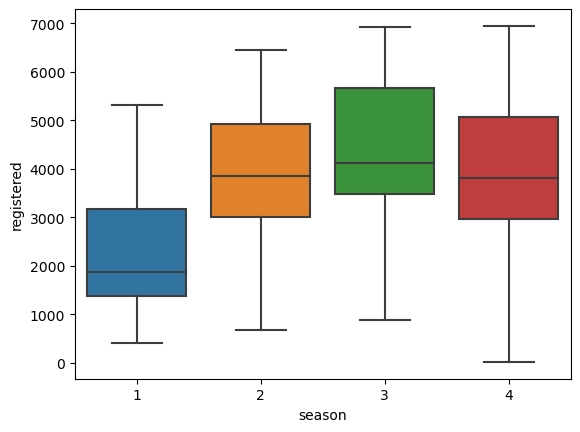

Boxplot season Vs cnt


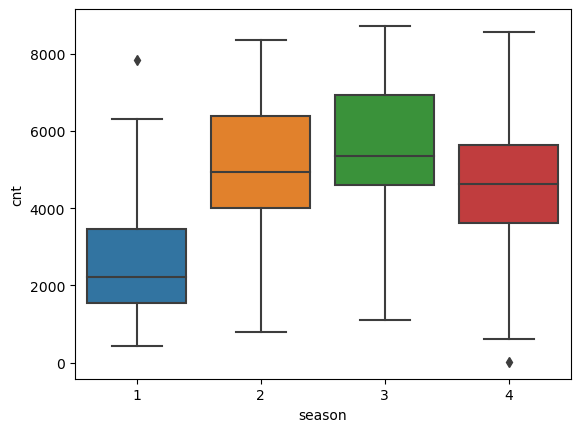

Boxplot yr Vs temp


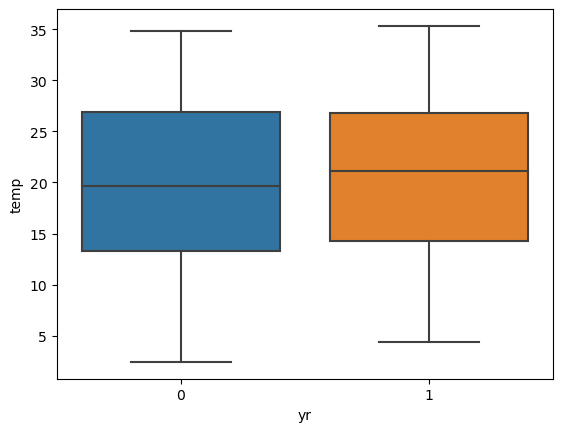

Boxplot yr Vs atemp


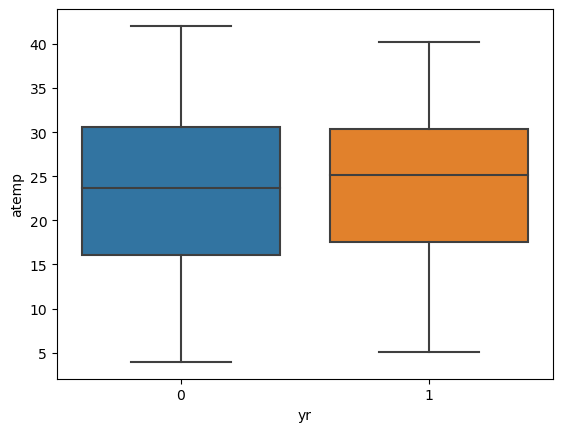

Boxplot yr Vs hum


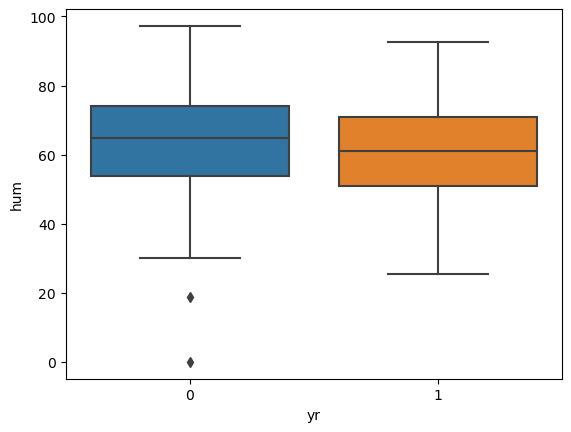

Boxplot yr Vs windspeed


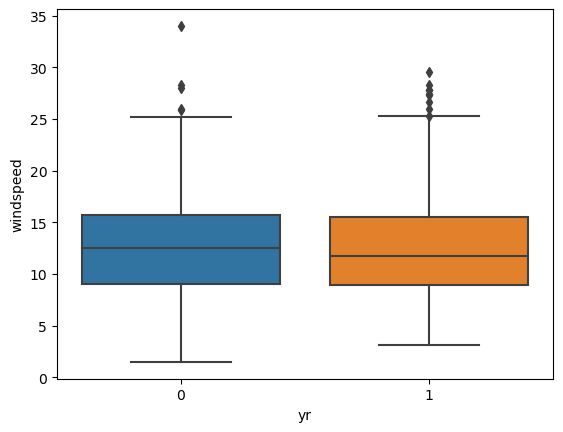

Boxplot yr Vs casual


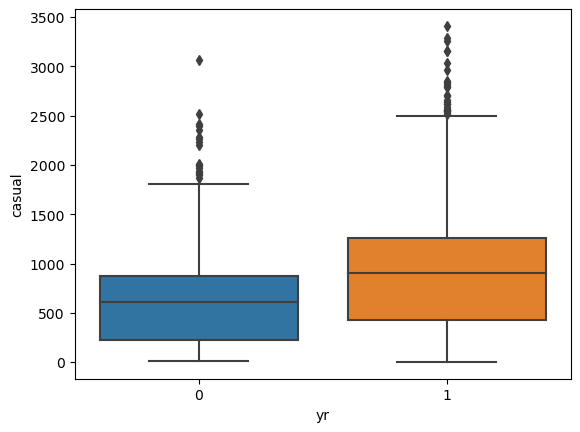

Boxplot yr Vs registered


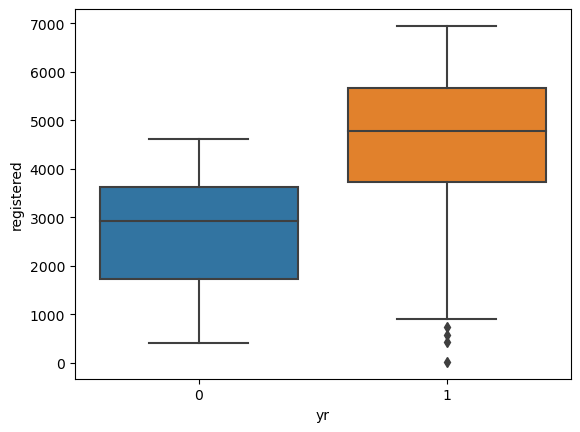

Boxplot yr Vs cnt


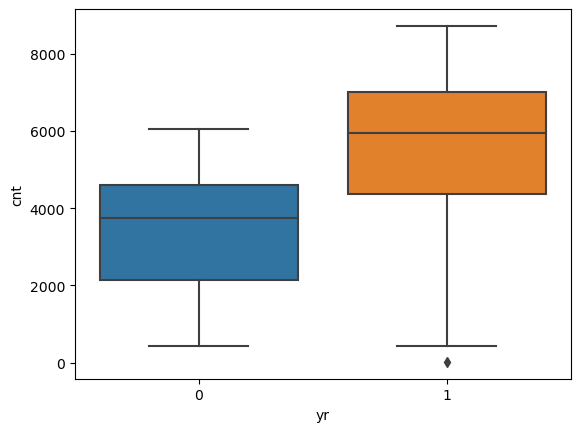

Boxplot mnth Vs temp


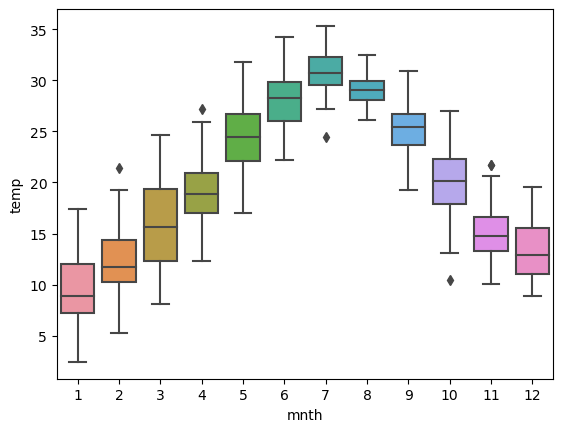

Boxplot mnth Vs atemp


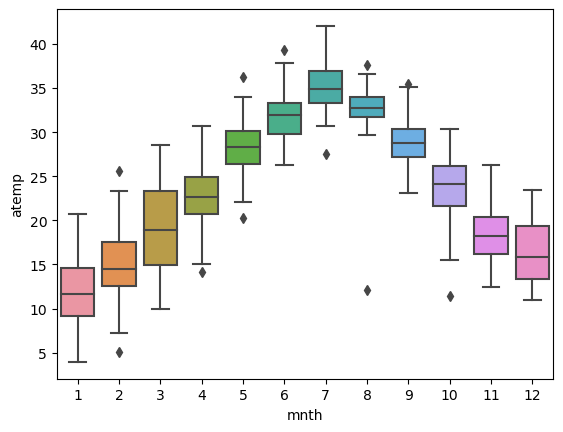

Boxplot mnth Vs hum


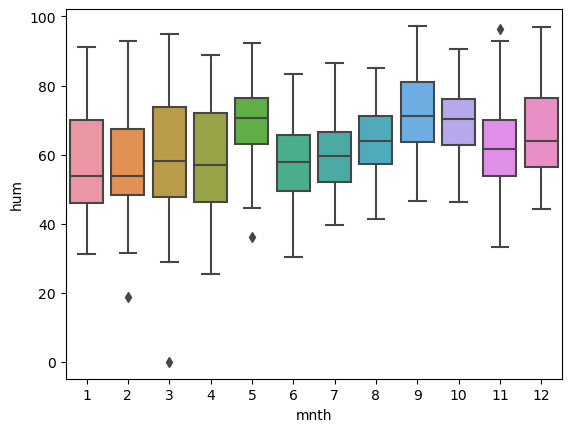

Boxplot mnth Vs windspeed


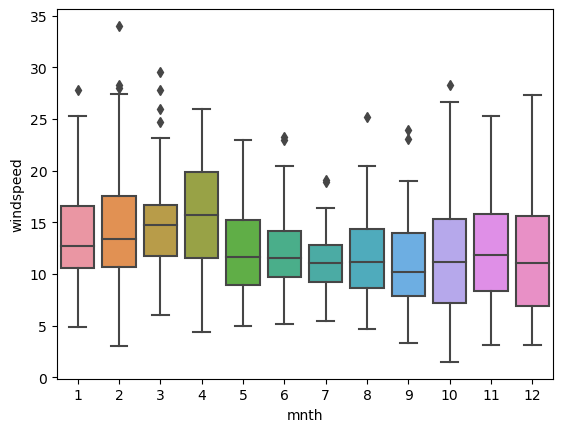

Boxplot mnth Vs casual


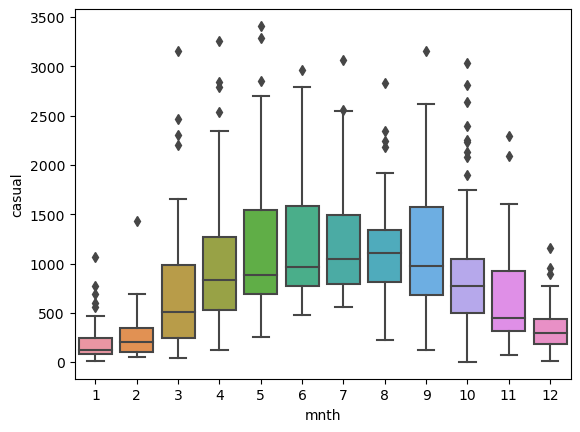

Boxplot mnth Vs registered


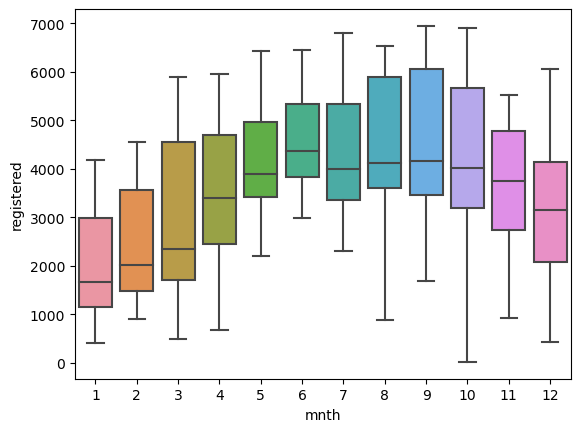

Boxplot mnth Vs cnt


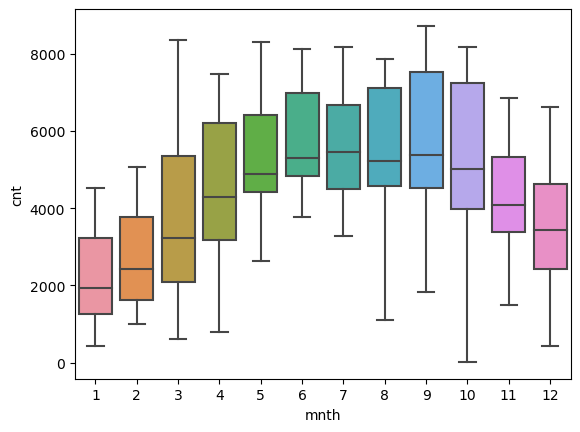

Boxplot holiday Vs temp


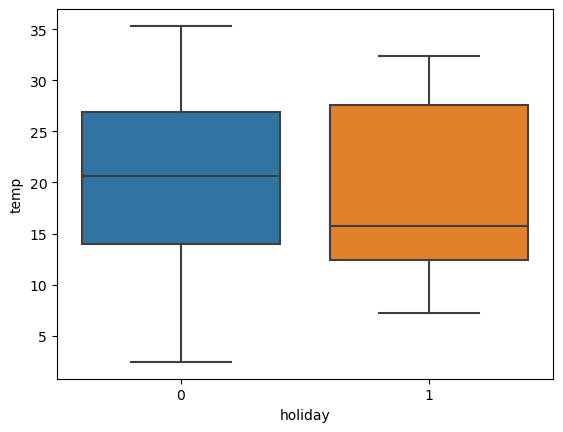

Boxplot holiday Vs atemp


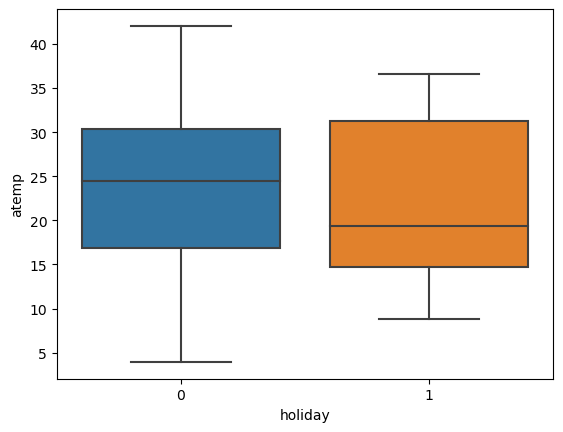

Boxplot holiday Vs hum


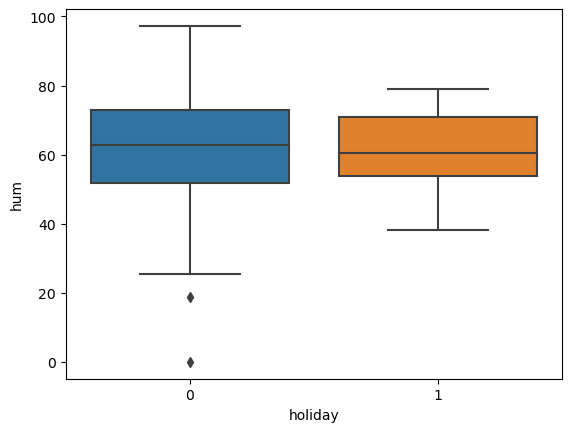

Boxplot holiday Vs windspeed


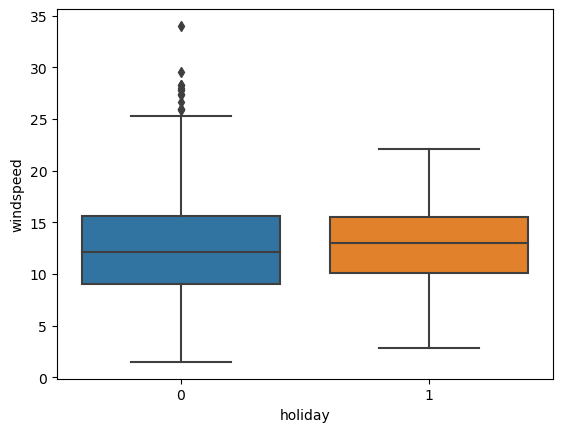

Boxplot holiday Vs casual


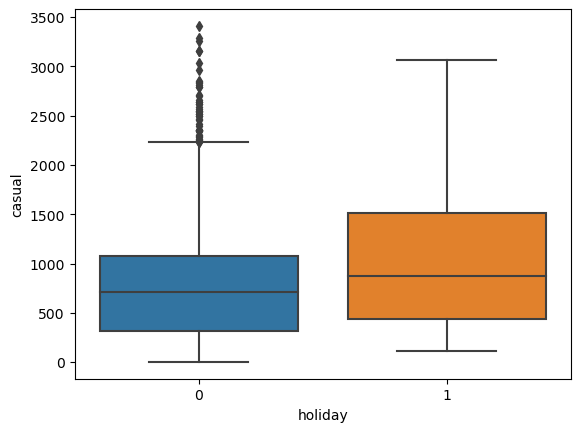

Boxplot holiday Vs registered


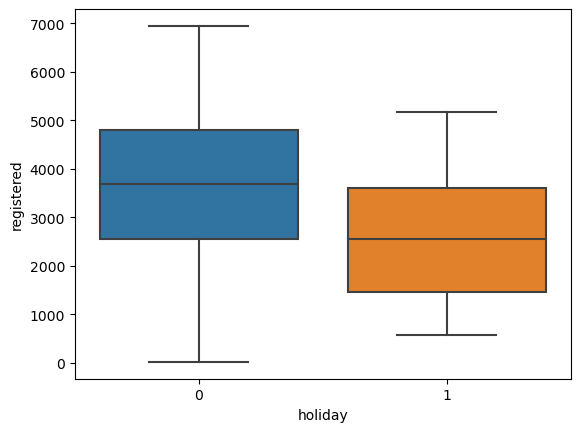

Boxplot holiday Vs cnt


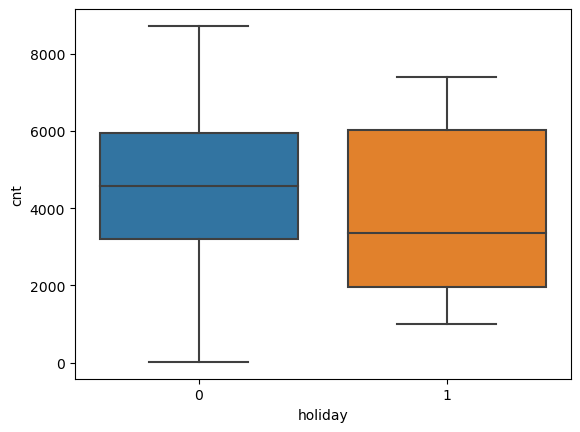

Boxplot weekday Vs temp


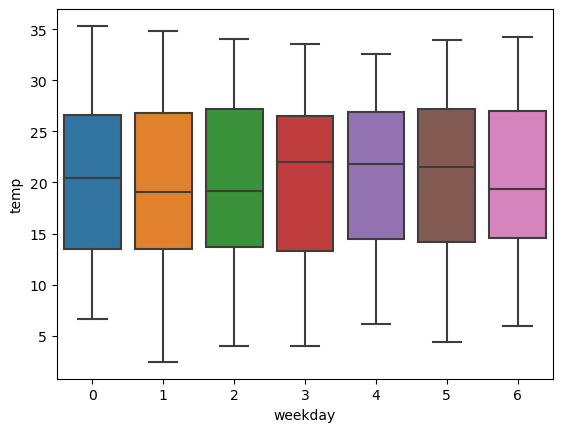

Boxplot weekday Vs atemp


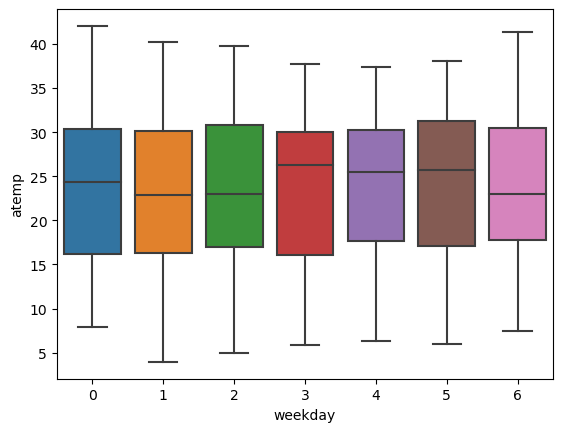

Boxplot weekday Vs hum


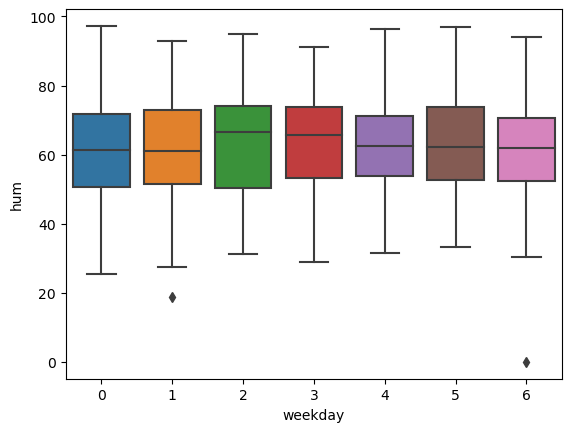

Boxplot weekday Vs windspeed


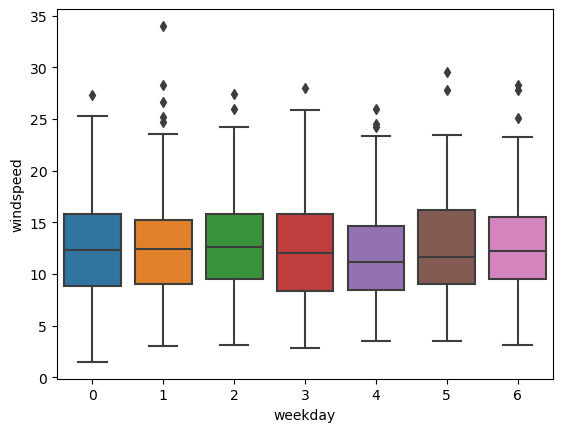

Boxplot weekday Vs casual


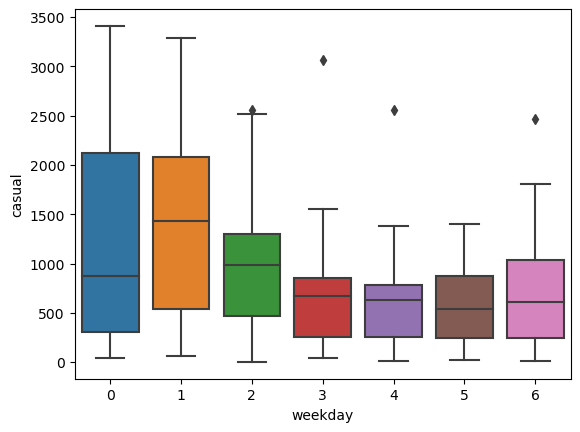

Boxplot weekday Vs registered


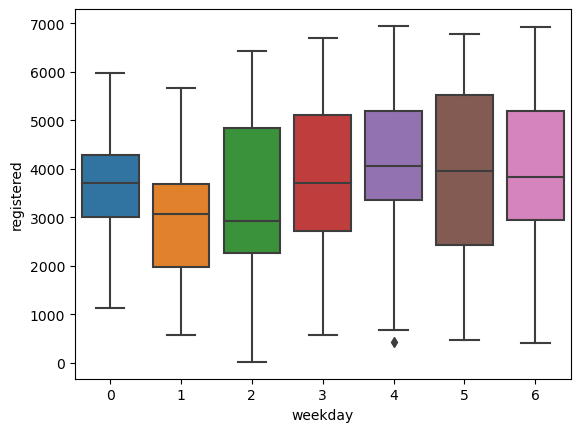

Boxplot weekday Vs cnt


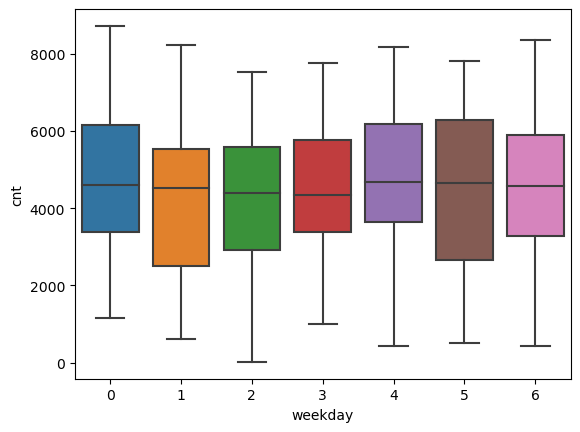

Boxplot workingday Vs temp


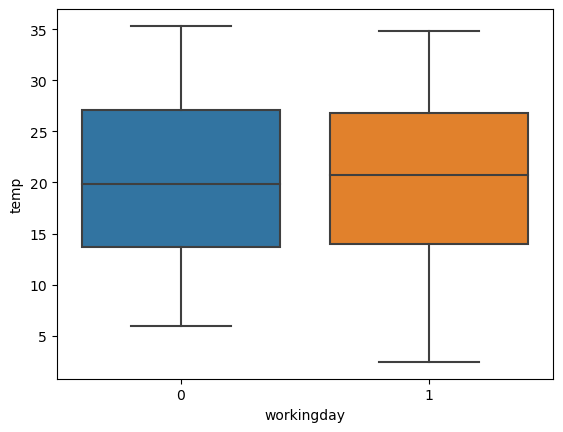

Boxplot workingday Vs atemp


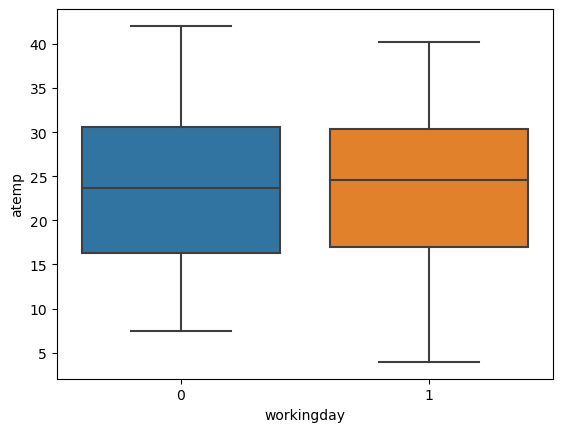

Boxplot workingday Vs hum


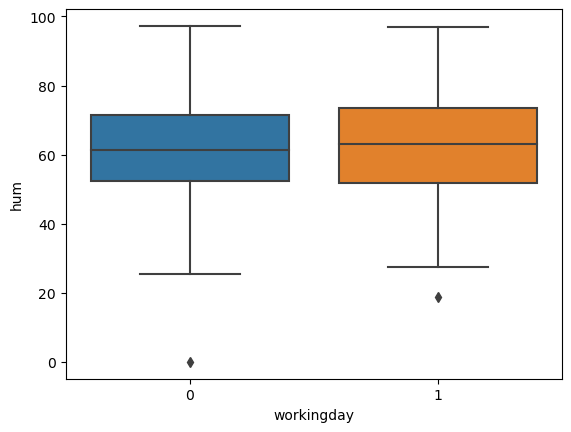

Boxplot workingday Vs windspeed


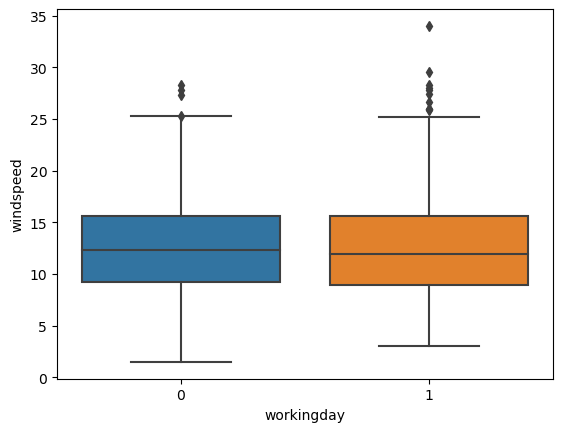

Boxplot workingday Vs casual


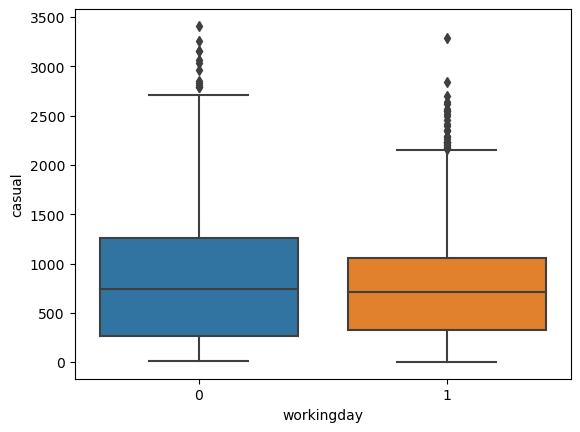

Boxplot workingday Vs registered


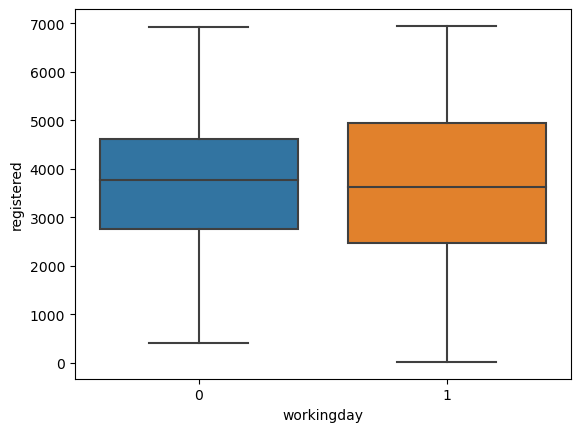

Boxplot workingday Vs cnt


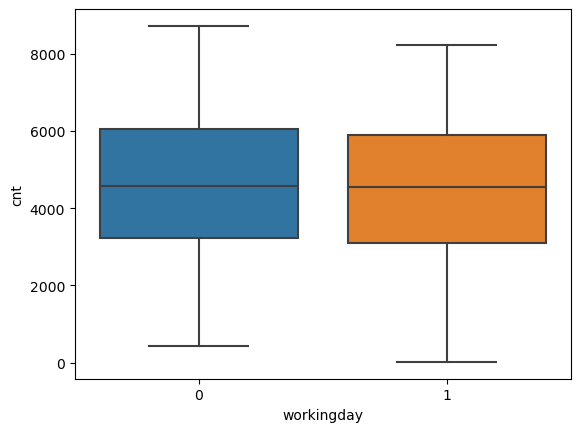

Boxplot weathersit Vs temp


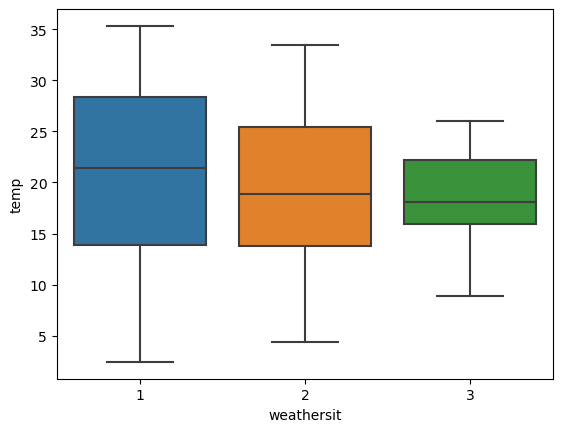

Boxplot weathersit Vs atemp


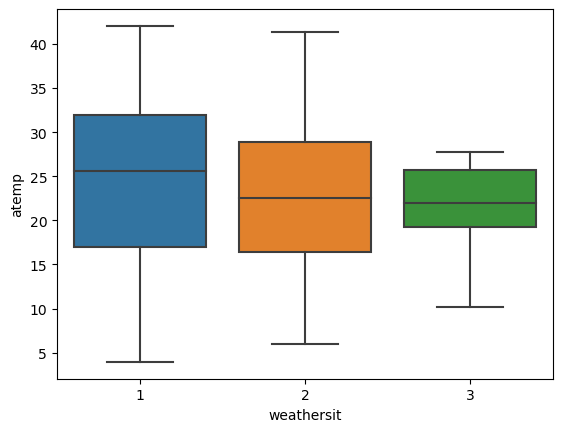

Boxplot weathersit Vs hum


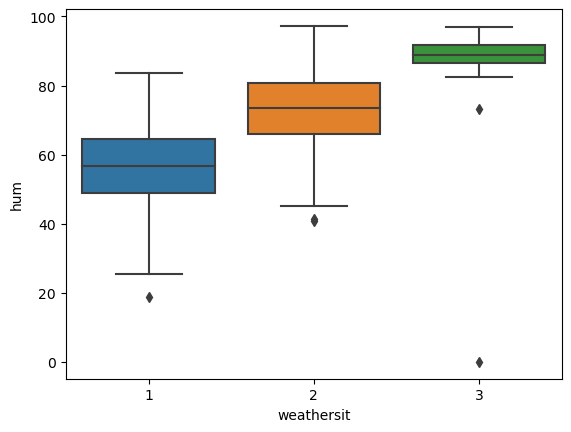

Boxplot weathersit Vs windspeed


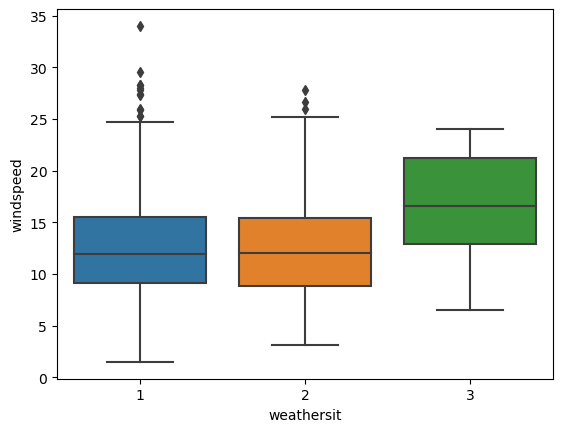

Boxplot weathersit Vs casual


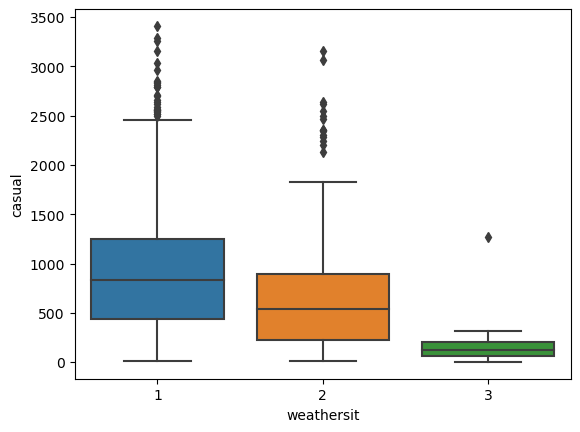

Boxplot weathersit Vs registered


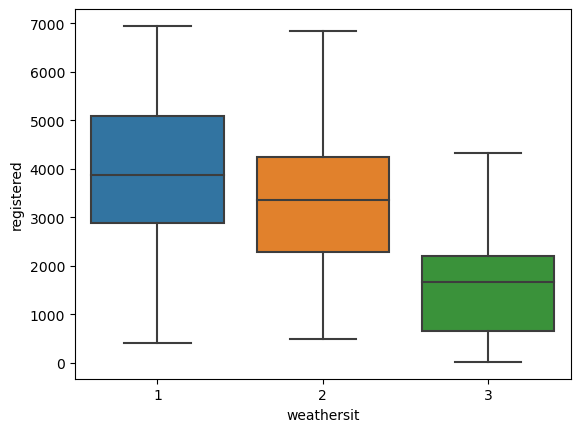

Boxplot weathersit Vs cnt


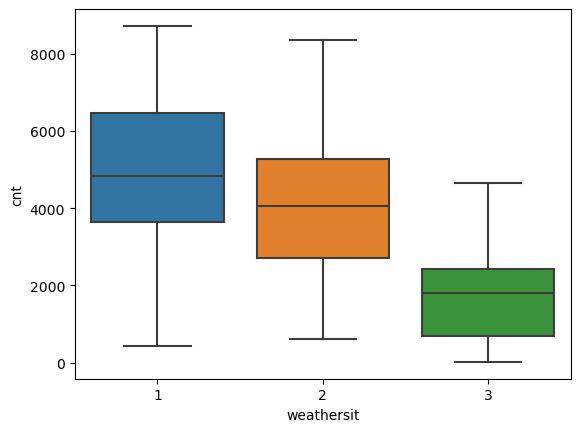

In [64]:
for i in cat:
    for j in cont:
        print("Boxplot", i, "Vs", j)
        sns.boxplot(data = df, x = i, y=j)
        plt.show()

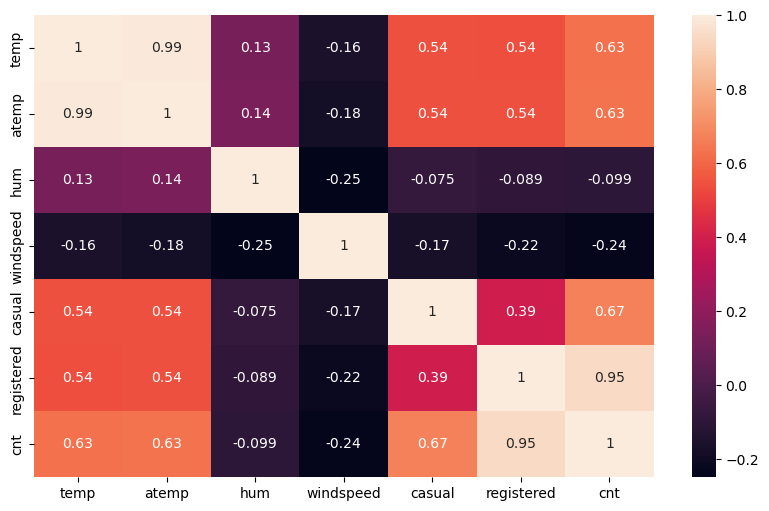

In [65]:
#### Multivariate Analysis


plt.figure(figsize = (10,6))
sns.heatmap(df[cont].corr(), annot = True)
plt.show()

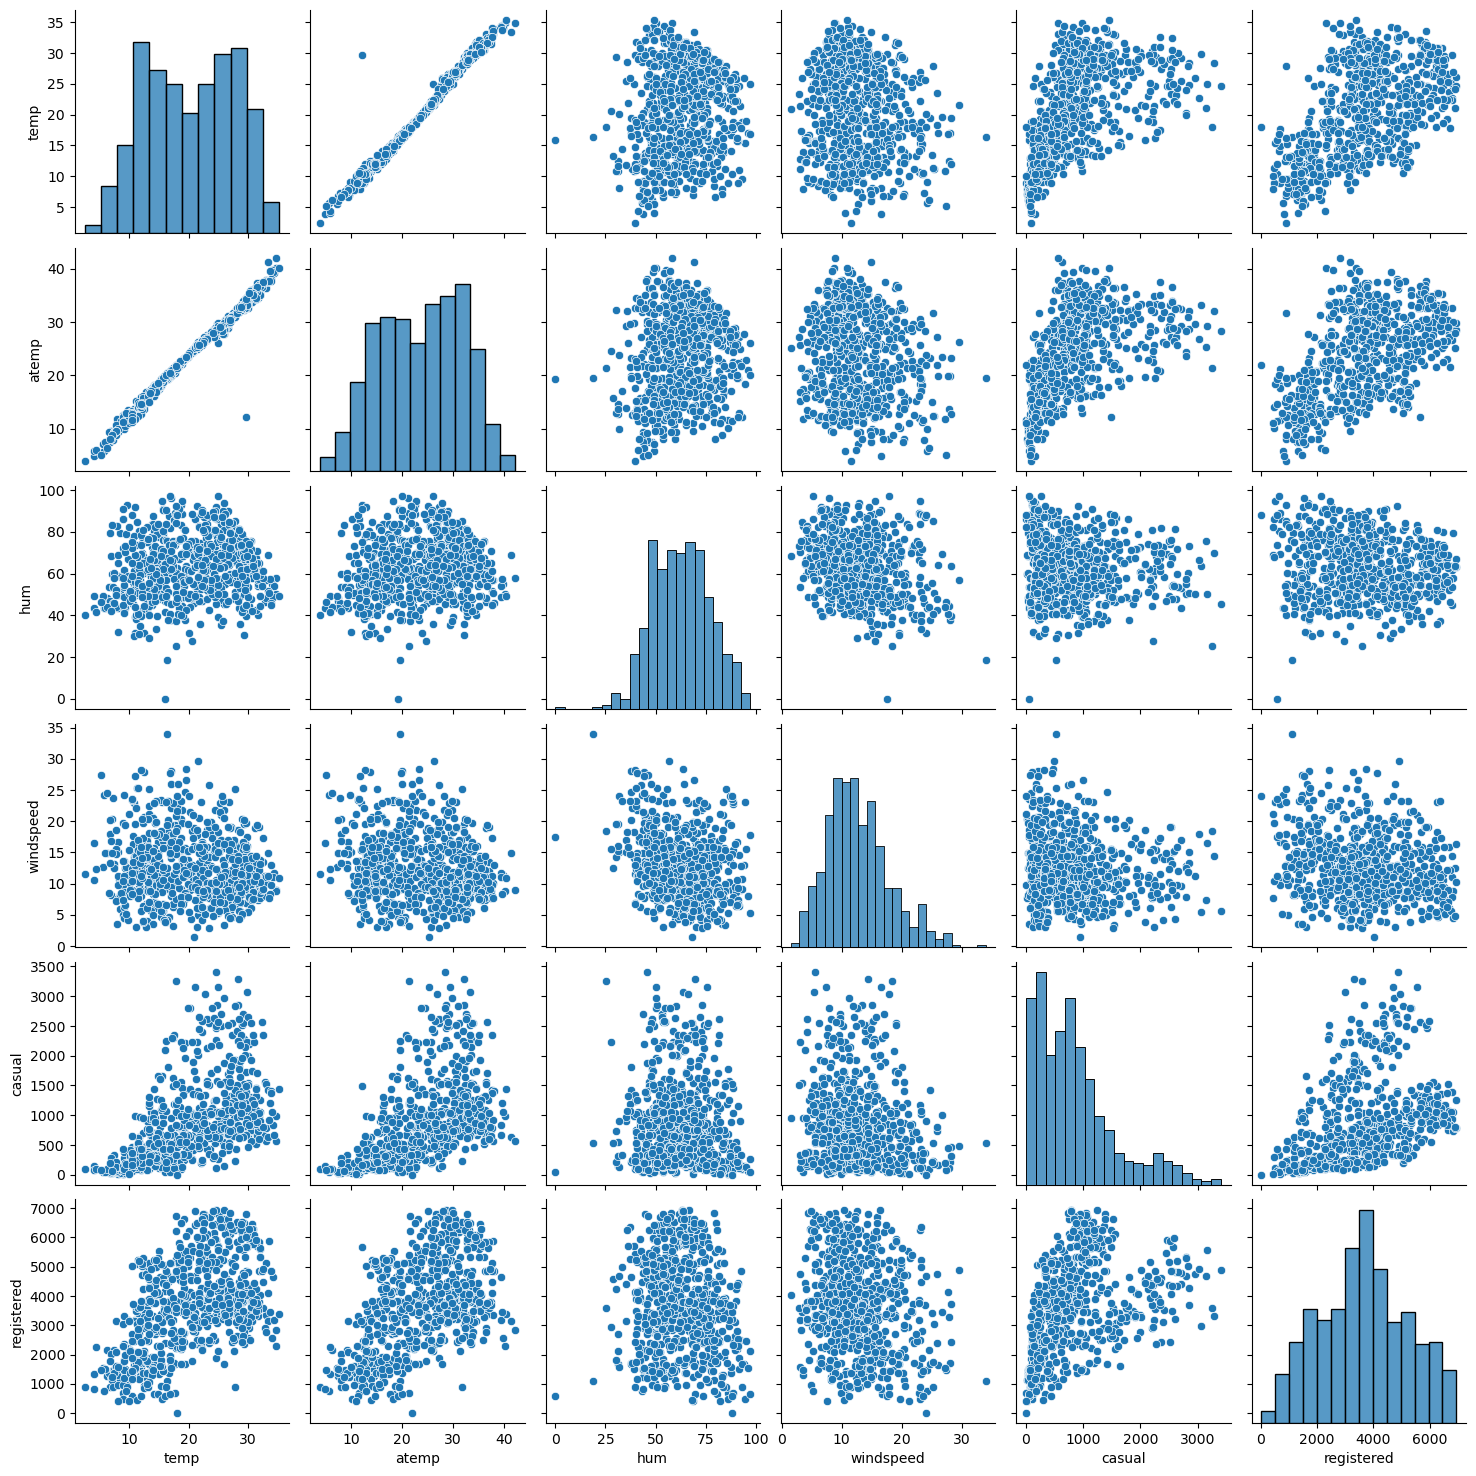

In [67]:
sns.pairplot(df[cont].drop(['cnt'],axis =1))
plt.show()

### Mean Vs Median

In [68]:
import numpy as np
arr = np.array([1,2,3,4,5])
print("Mean is", np.mean(arr))
print("Medain is", np.median(arr))

# If there are no outliers then the mean and median will be very same

Mean is 3.0
Medain is 3.0


In [69]:
import numpy as np
arr = np.array([1,2,3,4,5,100])
print("Mean is", np.mean(arr))
print("Median is", np.median(arr))

Mean is 19.166666666666668
Median is 3.5


#### Missing Value Imputations

In [77]:
pd.set_option('display.max_rows', 1000)

In [78]:
df = pd.read_csv('housing.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [79]:
df.shape

(1460, 81)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [82]:
# Percentage of missing Values

df.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

#### Percentage of missing values matter than the number of missing values. Hence mean is preffered rather than the sum

In [91]:
temp = df.isnull().mean().reset_index()
temp[0] = temp[0]*100
temp = temp.rename(columns = {'index':'Column Name', 0: '%Missing Values'})
temp.sort_values(by=['%Missing Values'], ascending = False)

## Deciding Threshold value
cols_to_drop = list(temp[temp['%Missing Values']>40]['Column Name'])
cols_to_drop           

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [95]:
df1 = df.drop(cols_to_drop, axis =1)

In [97]:
df1.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [98]:
df['LotFrontage'].isnull().mean()

0.1773972602739726

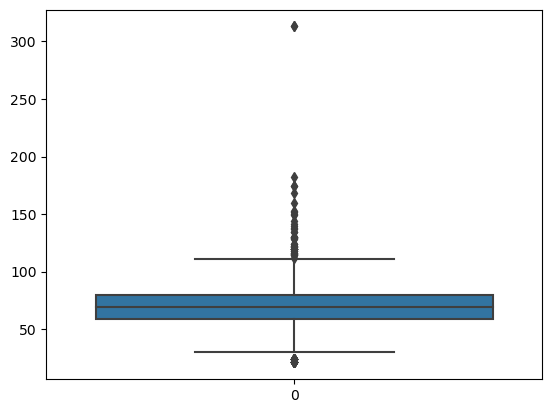

In [99]:
sns.boxplot(df['LotFrontage'])
plt.show()

In [100]:
imp_val = df['LotFrontage'].median()
imp_val

69.0

In [101]:
df['LotFrontage'] = df['LotFrontage'].fillna(imp_val)

In [102]:
df['LotFrontage'].isnull().mean()

0.0

#### Automated approach

#### Demo code

for i in cont:
    if df[i].isnull().mean()>0:
        imp_val = df[i].median()
        df[i]=df[i].fillna(imp_val)
        
        
#### We can do the same for categorical column using mode

for i in cat:
    if df[i].isnull().mean()>0:
        imp_val = df[i].mode()[0]
        df[i]=df[i].fillna(imp_val)

## Outliers

In [104]:
df['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [119]:
q1 = df1["LotFrontage"].describe()["25%"]
q3=df1["LotFrontage"].describe()["75%"]
iqr=q3-q1 #interquartile range
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

#### Caping

The values greater than upper_bound are capped at upper_bound which means we equal them to upper_bound

#### Flooring

The values lesser than lower_bound are floored at lower_bound


<Axes: >

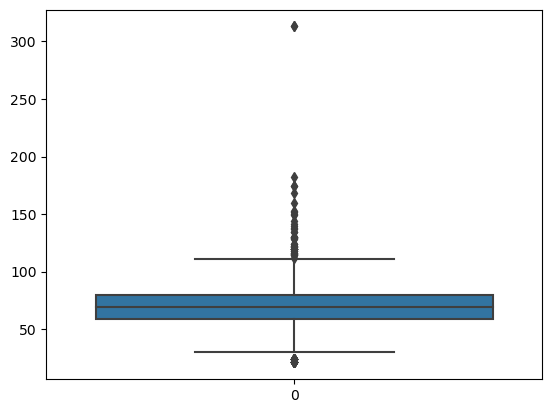

In [120]:
sns.boxplot(df1['LotFrontage'])

In [123]:
q1 = df1["LotFrontage"].describe()["25%"]
q3=df1["LotFrontage"].describe()["75%"]
iqr=q3-q1 #interquartile range
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df1['LotFrontage'] = np.where(df1['LotFrontage']>upper_bound, upper_bound, df1['LotFrontage'])
df1['LotFrontage'] = np.where(df1['LotFrontage']<lower_bound, lower_bound, df1['LotFrontage'])

In [124]:
for i in cont:
    q1 = df1["LotFrontage"].describe()["25%"]
    q3=df1["LotFrontage"].describe()["75%"]
    iqr=q3-q1 #interquartile range
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df1['LotFrontage'] = np.where(df1['LotFrontage']>upper_bound, upper_bound, df1['LotFrontage'])
    df1['LotFrontage'] = np.where(df1['LotFrontage']<lower_bound, lower_bound, df1['LotFrontage'])